# Bikeshare rides (Summer 2018)
This notebook analyzes bikeshare data for NYC citibikes. The goal is to understand in what capacity people use bikeshare for daily activities, i.e. grocery shopping, commuting, etc. 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplleaflet
import pandas as pd
import numpy as np
import json
import math
from matplotlib import cm

#import os

#os.environ['PROJ_LIB'] = r'C:\Users\pgsze\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

from mpl_toolkits.basemap import Basemap

# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
#import tilemapbase
#tilemapbase.start_logging()

In [2]:
summer_df_list = []

for el in ['06','07','08']:
    summer_df_list.append(pd.read_csv('./data/NYC/2018/2018{}-citibike-tripdata/2018{}-citibike-tripdata.csv'.format(el,el)))

#df = pd.read_csv('./data/NYC/2018/201806-citibike-tripdata/201806-citibike-tripdata.csv')
summer_df_list[0].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,569,2018-06-01 01:57:20.5140,2018-06-01 02:06:50.0880,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760683,-73.984527,21481,Subscriber,1999,1
1,480,2018-06-01 02:02:42.3980,2018-06-01 02:10:43.3540,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,19123,Subscriber,1988,1
2,692,2018-06-01 02:04:23.6240,2018-06-01 02:15:55.7470,72,W 52 St & 11 Ave,40.767272,-73.993929,457,Broadway & W 58 St,40.766953,-73.981693,26983,Subscriber,1986,1
3,664,2018-06-01 03:00:55.4610,2018-06-01 03:11:59.9060,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,26742,Subscriber,1973,1
4,818,2018-06-01 06:04:54.4270,2018-06-01 06:18:32.6170,72,W 52 St & 11 Ave,40.767272,-73.993929,459,W 20 St & 11 Ave,40.746745,-74.007756,26386,Subscriber,1984,1


In [3]:
summer_df = pd.concat(summer_df_list,ignore_index=True)#, keys = ['Jun', 'Jul', 'Aug'])
summer_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,569,2018-06-01 01:57:20.5140,2018-06-01 02:06:50.0880,72.0,W 52 St & 11 Ave,40.767272,-73.993929,173.0,Broadway & W 49 St,40.760683,-73.984527,21481,Subscriber,1999,1
1,480,2018-06-01 02:02:42.3980,2018-06-01 02:10:43.3540,72.0,W 52 St & 11 Ave,40.767272,-73.993929,477.0,W 41 St & 8 Ave,40.756405,-73.990026,19123,Subscriber,1988,1
2,692,2018-06-01 02:04:23.6240,2018-06-01 02:15:55.7470,72.0,W 52 St & 11 Ave,40.767272,-73.993929,457.0,Broadway & W 58 St,40.766953,-73.981693,26983,Subscriber,1986,1
3,664,2018-06-01 03:00:55.4610,2018-06-01 03:11:59.9060,72.0,W 52 St & 11 Ave,40.767272,-73.993929,379.0,W 31 St & 7 Ave,40.749156,-73.991600,26742,Subscriber,1973,1
4,818,2018-06-01 06:04:54.4270,2018-06-01 06:18:32.6170,72.0,W 52 St & 11 Ave,40.767272,-73.993929,459.0,W 20 St & 11 Ave,40.746745,-74.007756,26386,Subscriber,1984,1


In [3]:
num_WD = 31+31+30-26 #Note I'm not subtracting holidays here, maybe later...
num_WE = 26

In [4]:
from bike_share_functions import bike_clean_df

subs_df = bike_clean_df(summer_df)

In [5]:
from bike_share_functions import get_stations_info

stations_info_df = get_stations_info(subs_df)
stations_info_df.head()

,lat,lon,station name
start station id,,,
72,40.767272,-73.993929,W 52 St & 11 Ave
79,40.719116,-74.006667,Franklin St & W Broadway
82,40.711174,-74.000165,St James Pl & Pearl St
83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl
119,40.696089,-73.978034,Park Ave & St Edwards St


In [6]:
from bike_share_functions import get_trip_info
import time
start = time.time()

subs_trips_df = get_trip_info(subs_df)

end = time.time()
print(end-start)

subs_trips_df.head()

123.70708894729614


,tripduration,starttime,stoptime,start station id,end station id,bikeid,usertype,birth year,gender,start_day,stop_day,pickup_hour,dropoff_hour,age,Trip_Type,start_end_station
0,569,2018-06-01 01:57:20.514,2018-06-01 02:06:50.088,72,173,21481,Subscriber,1999,1,4,4,1,2,19,Late Night,"(72, 173)"
1,480,2018-06-01 02:02:42.398,2018-06-01 02:10:43.354,72,477,19123,Subscriber,1988,1,4,4,2,2,30,Late Night,"(72, 477)"
2,692,2018-06-01 02:04:23.624,2018-06-01 02:15:55.747,72,457,26983,Subscriber,1986,1,4,4,2,2,32,Late Night,"(72, 457)"
3,664,2018-06-01 03:00:55.461,2018-06-01 03:11:59.906,72,379,26742,Subscriber,1973,1,4,4,3,3,45,Late Night,"(72, 379)"
4,818,2018-06-01 06:04:54.427,2018-06-01 06:18:32.617,72,459,26386,Subscriber,1984,1,4,4,6,6,34,Commuter,"(72, 459)"


In [7]:
subs_df.to_pickle('./data/pickledDFs/subs_df-NYC_Summer_2018.pkl')
stations_info_df.to_pickle('./data/pickledDFs/stations_info_df-NYC_Summer_2018.pkl')
subs_trips_df.to_pickle('./data/pickledDFs/subs_trips_df-NYC_Summer_2018.pkl')

In [67]:
print(len(subs_df[subs_df['tripduration']< 86400]))
print(len(subs_df))

5025635
5026245


In [69]:
weekday_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] != 'Weekend'].copy()
weekday_subs_trips_df = weekday_subs_trips_df[weekday_subs_trips_df['tripduration'] < 86400]
weekend_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] == 'Weekend'].copy()
weekend_subs_trips_df = weekend_subs_trips_df[weekend_subs_trips_df['tripduration'] < 86400]

In [20]:
#from bike_share_functions import get_hourly_pickups
#
#weekday_subs_df = get_hourly_pickups(df,weekday_only=True)
#weekend_subs_df = get_hourly_pickups(df,weekend_only=True)

In [20]:
weekend_subs_trips_df.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,usertype,birth year,gender,start_day,stop_day,pickup_hour,dropoff_hour,age,Trip_Type,start_end_station
155,449,2018-06-02 00:38:55.625,2018-06-02 00:46:25.314,72,529,32944,Subscriber,1988,1,5,5,0,0,30,Weekend,"(72, 529)"
158,743,2018-06-02 02:00:16.492,2018-06-02 02:12:39.978,72,500,14980,Subscriber,1999,1,5,5,2,2,19,Weekend,"(72, 500)"
159,357,2018-06-02 07:10:46.644,2018-06-02 07:16:44.311,72,457,18840,Subscriber,1981,1,5,5,7,7,37,Weekend,"(72, 457)"
160,521,2018-06-02 07:32:45.649,2018-06-02 07:41:27.025,72,533,31040,Subscriber,1981,1,5,5,7,7,37,Weekend,"(72, 533)"
161,382,2018-06-02 07:39:52.955,2018-06-02 07:46:15.558,72,3173,19164,Subscriber,1987,1,5,5,7,7,31,Weekend,"(72, 3173)"


In [ ]:
WD_pickup_groupby['starttime'].count()

In [22]:
%timeit weekend_subs_trips_df.groupby([weekend_subs_trips_df.starttime.map(lambda x: x.hour)])

9.38 s ± 634 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit weekend_subs_trips_df.groupby(['starttime'])

584 µs ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>


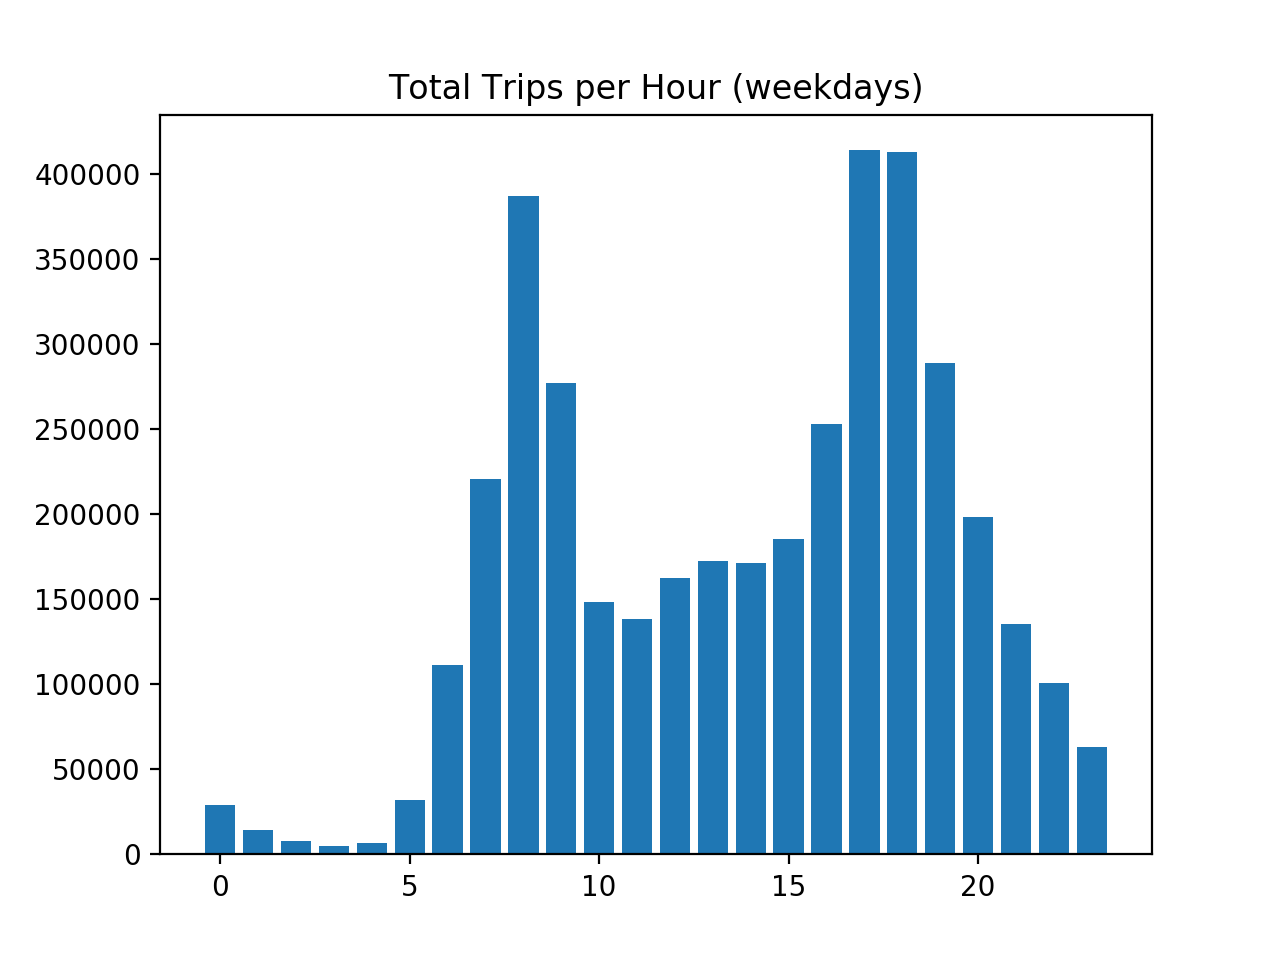

Text(0.5, 1.0, 'Total Trips per Hour (weekdays)')

In [70]:
fig = plt.figure()
ax = fig.gca()

total_rides_by_hour = weekday_subs_trips_df.groupby('pickup_hour')['starttime'].count()

ax.bar(total_rides_by_hour.index,total_rides_by_hour)
ax.set_title('Total Trips per Hour (weekdays)')


<IPython.core.display.Javascript object>


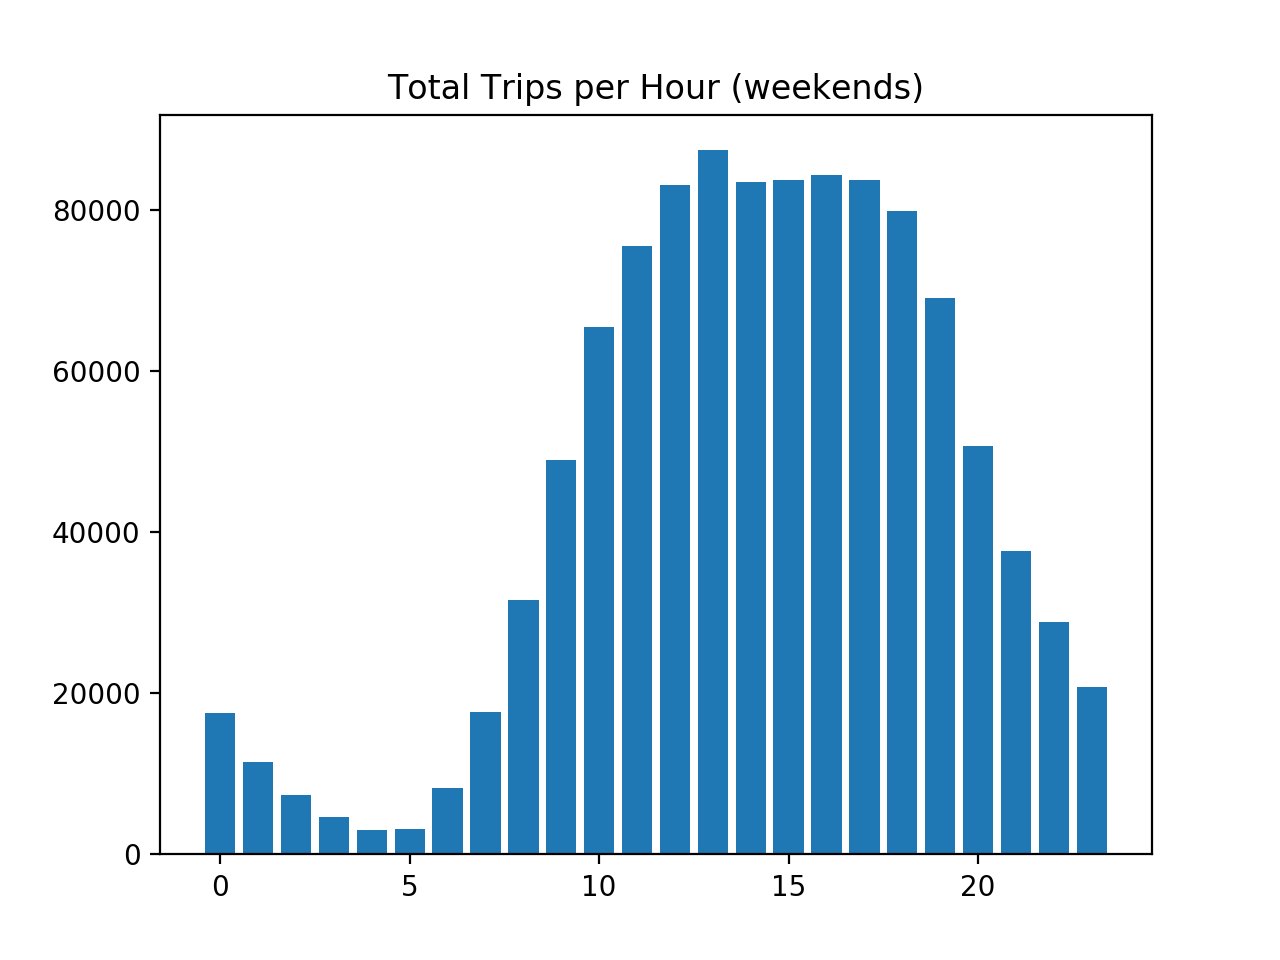

Text(0.5, 1.0, 'Total Trips per Hour (weekends)')

In [30]:
fig = plt.figure()
ax = fig.gca()

total_rides_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['starttime'].count()

ax.bar(total_rides_by_hour.index,total_rides_by_hour)
ax.set_title('Total Trips per Hour (weekends)')

<IPython.core.display.Javascript object>


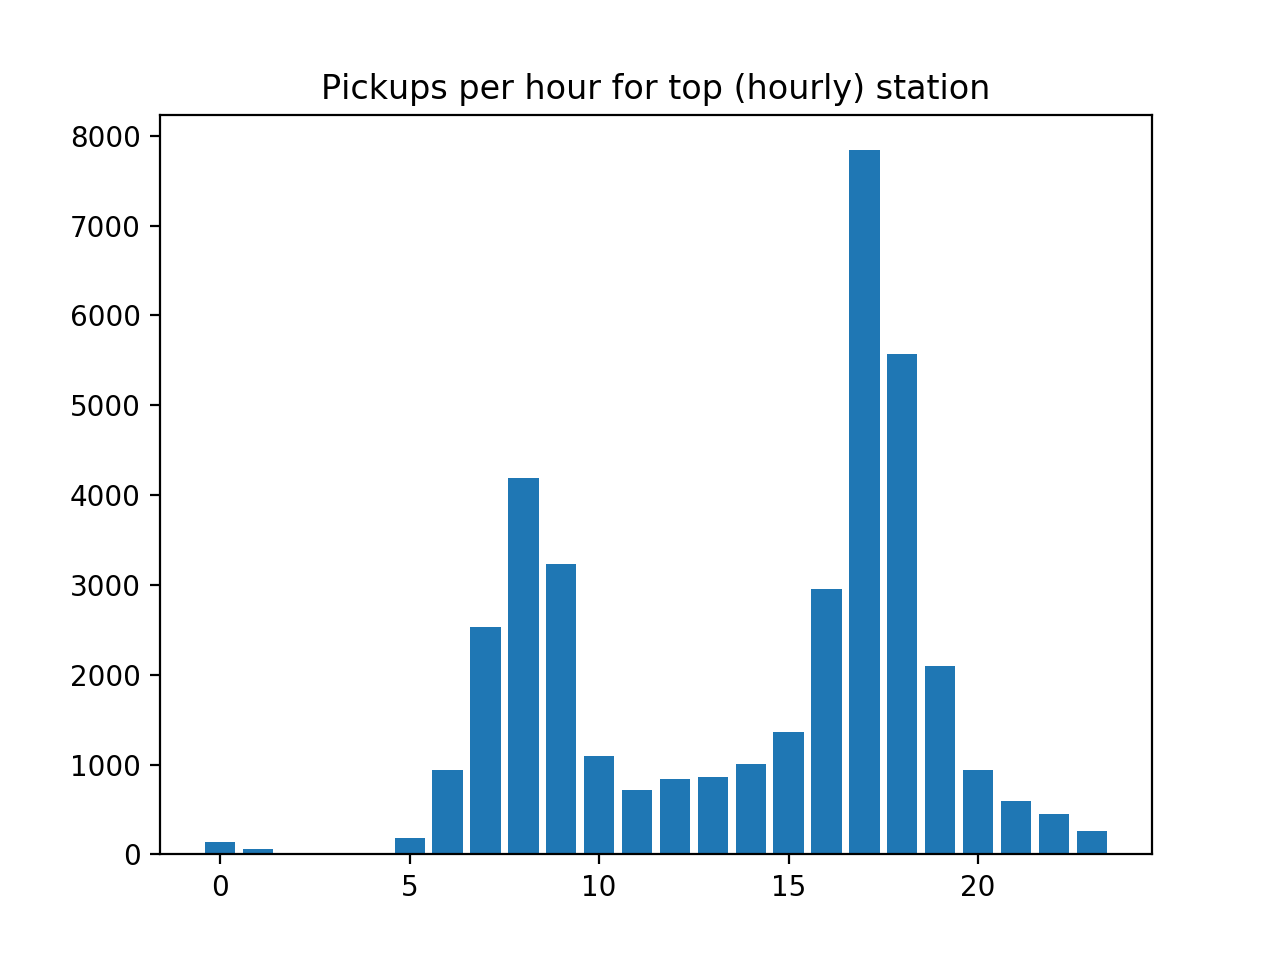

Text(0.5, 1.0, 'Pickups per hour for top (hourly) station')

In [26]:
plt.figure() 
ax = plt.gca()

total_rides_by_hr_st = weekday_subs_df.groupby(['pickup_hour','start station id'])['tripduration'].count()
total_rides_by_hr_st = total_rides_by_hr_st.rename('total_trips') 

max_pu_st = total_rides_by_hr_st.idxmax()[1]

top_pu_station = total_rides_by_hr_st.loc[:,max_pu_st]


ax.bar(top_pu_station.index,top_pu_station)
ax.set_title('Pickups per hour for top (hourly) station (weekday)')
#plt.bar(top_do_station.index,top_do_station)

<IPython.core.display.Javascript object>


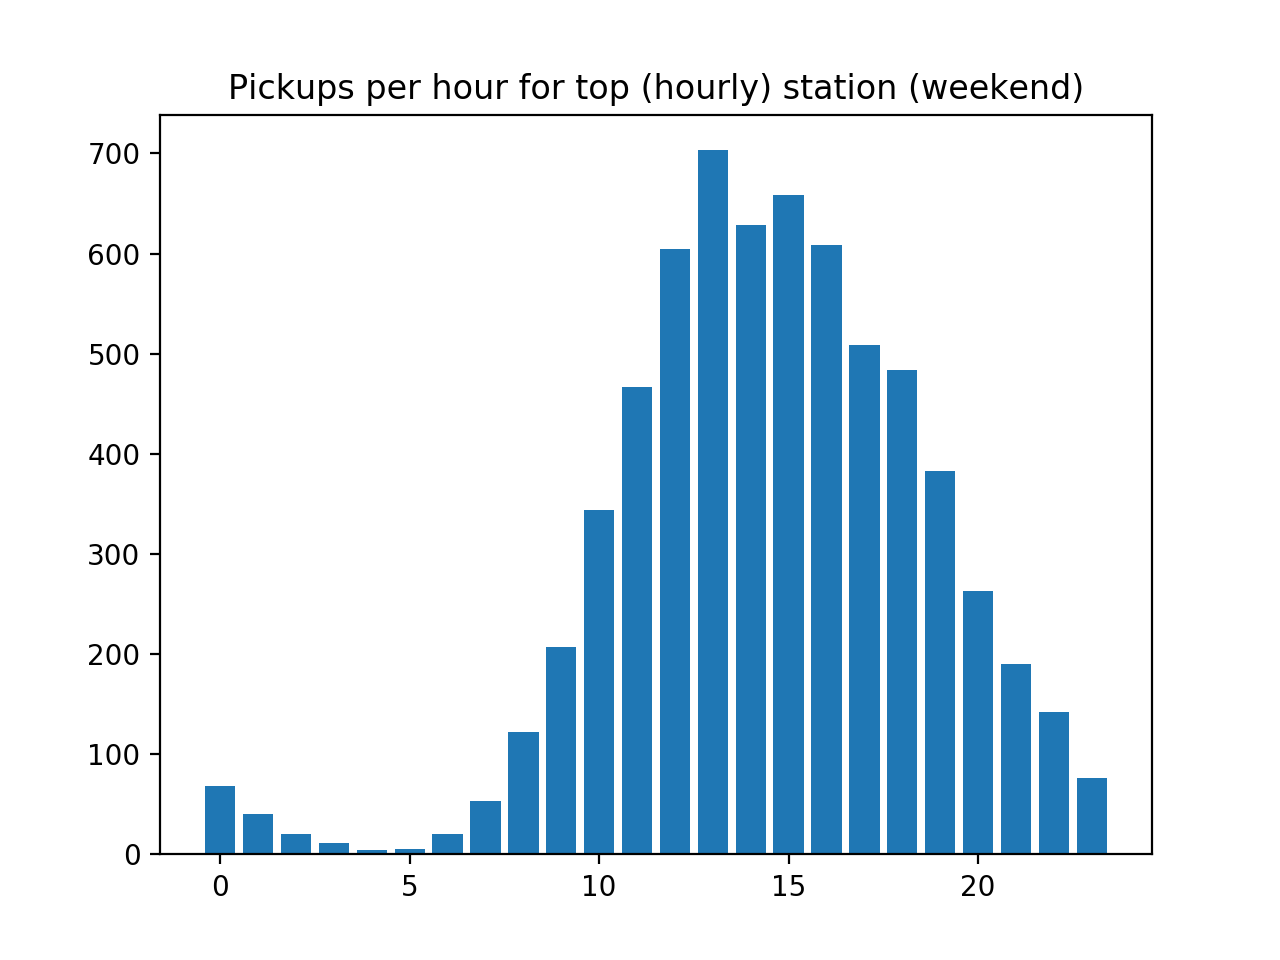

Text(0.5, 1.0, 'Pickups per hour for top (hourly) station (weekend)')

In [27]:
plt.figure() 
ax = plt.gca()

total_rides_by_hr_st = weekend_subs_df.groupby(['pickup_hour','start station id'])['tripduration'].count()
total_rides_by_hr_st = total_rides_by_hr_st.rename('total_trips') 

max_pu_st = total_rides_by_hr_st.idxmax()[1]

top_pu_station = total_rides_by_hr_st.loc[:,max_pu_st]


ax.bar(top_pu_station.index,top_pu_station)
ax.set_title('Pickups per hour for top (hourly) station (weekend)')
#plt.bar(top_do_station.index,top_do_station)

In [ ]:
plt.figure() 

top_hour = total_rides_by_hr_st.loc[17]

plt.bar(top_hour.index,top_hour)

<IPython.core.display.Javascript object>


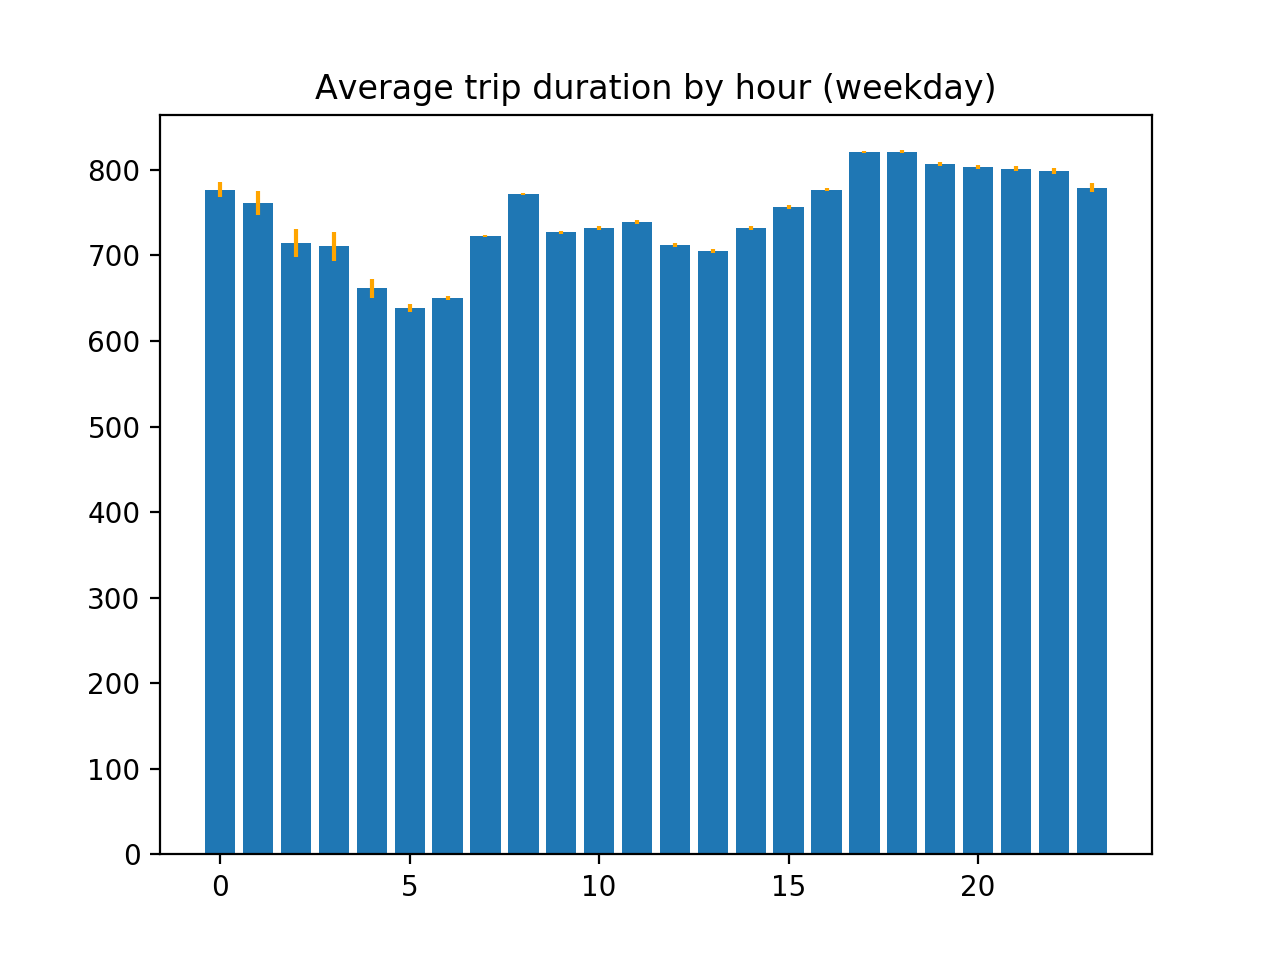

Text(0.5, 1.0, 'Average trip duration by hour (weekday)')

In [71]:
fig = plt.figure()
ax = fig.gca()


avg_duration_by_hour = weekday_subs_trips_df.groupby('pickup_hour')['tripduration'].mean()

total_rides_by_hour = weekday_subs_trips_df.groupby('pickup_hour')['tripduration'].count()
yerror = weekday_subs_trips_df.groupby('pickup_hour')['tripduration'].std()/(total_rides_by_hour)**(1/2)

ax.bar(avg_duration_by_hour.index,avg_duration_by_hour, yerr=yerror,ecolor = 'orange')
ax.set_title('Average trip duration by hour (weekday)')

<IPython.core.display.Javascript object>


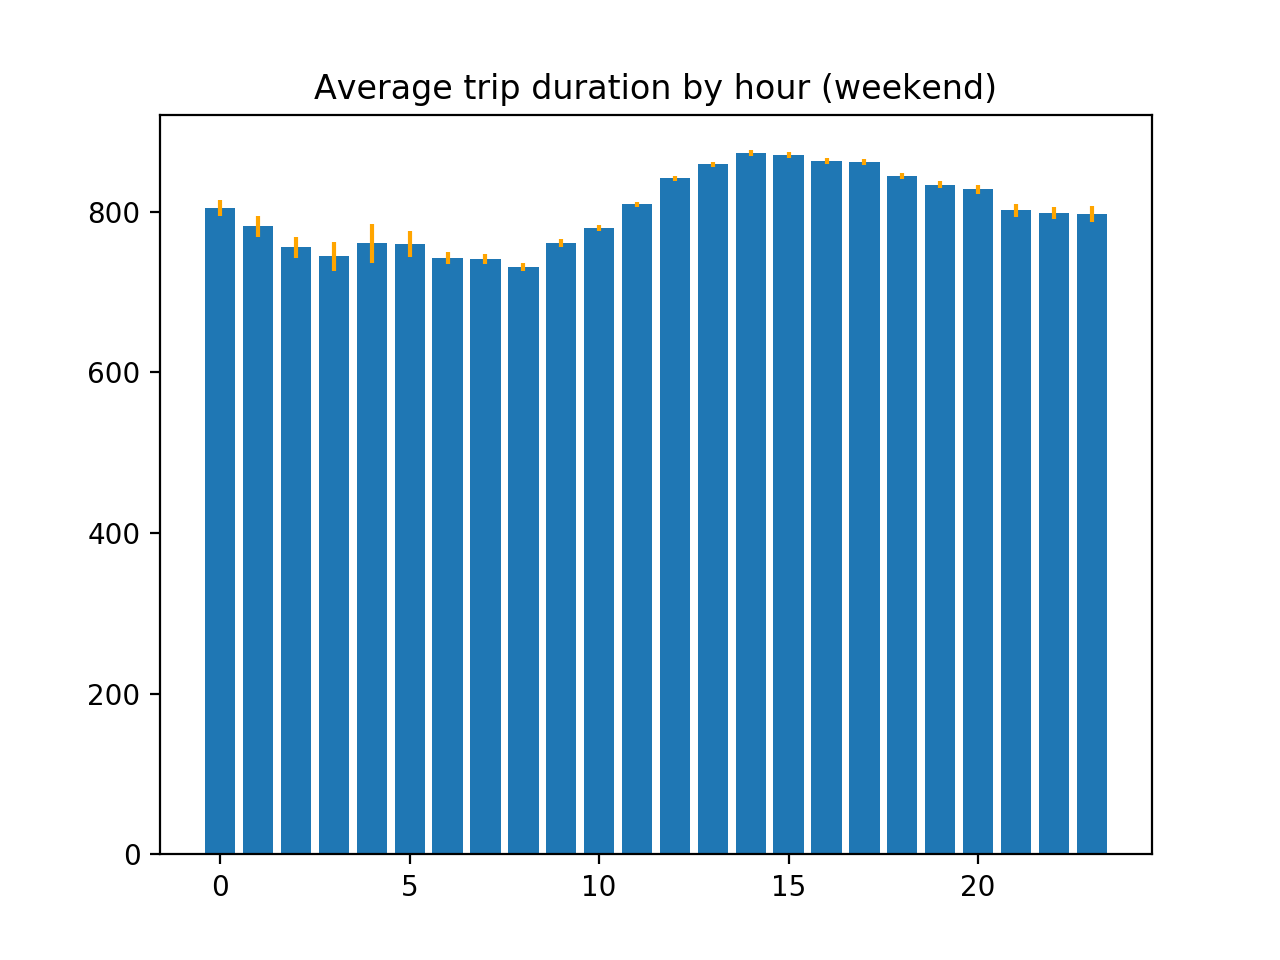

Text(0.5, 1.0, 'Average trip duration by hour (weekend)')

In [72]:
fig = plt.figure()
ax = fig.gca()

avg_duration_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['tripduration'].mean()

total_rides_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['tripduration'].count()
yerror = weekend_subs_trips_df.groupby('pickup_hour')['tripduration'].std()/(total_rides_by_hour)**(1/2)
#yerror = weekend_subs_trips_df.groupby('pickup_hour')['tripduration'].std()/avg_duration_by_hour

ax.bar(avg_duration_by_hour.index,avg_duration_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Average trip duration by hour (weekend)')

<IPython.core.display.Javascript object>


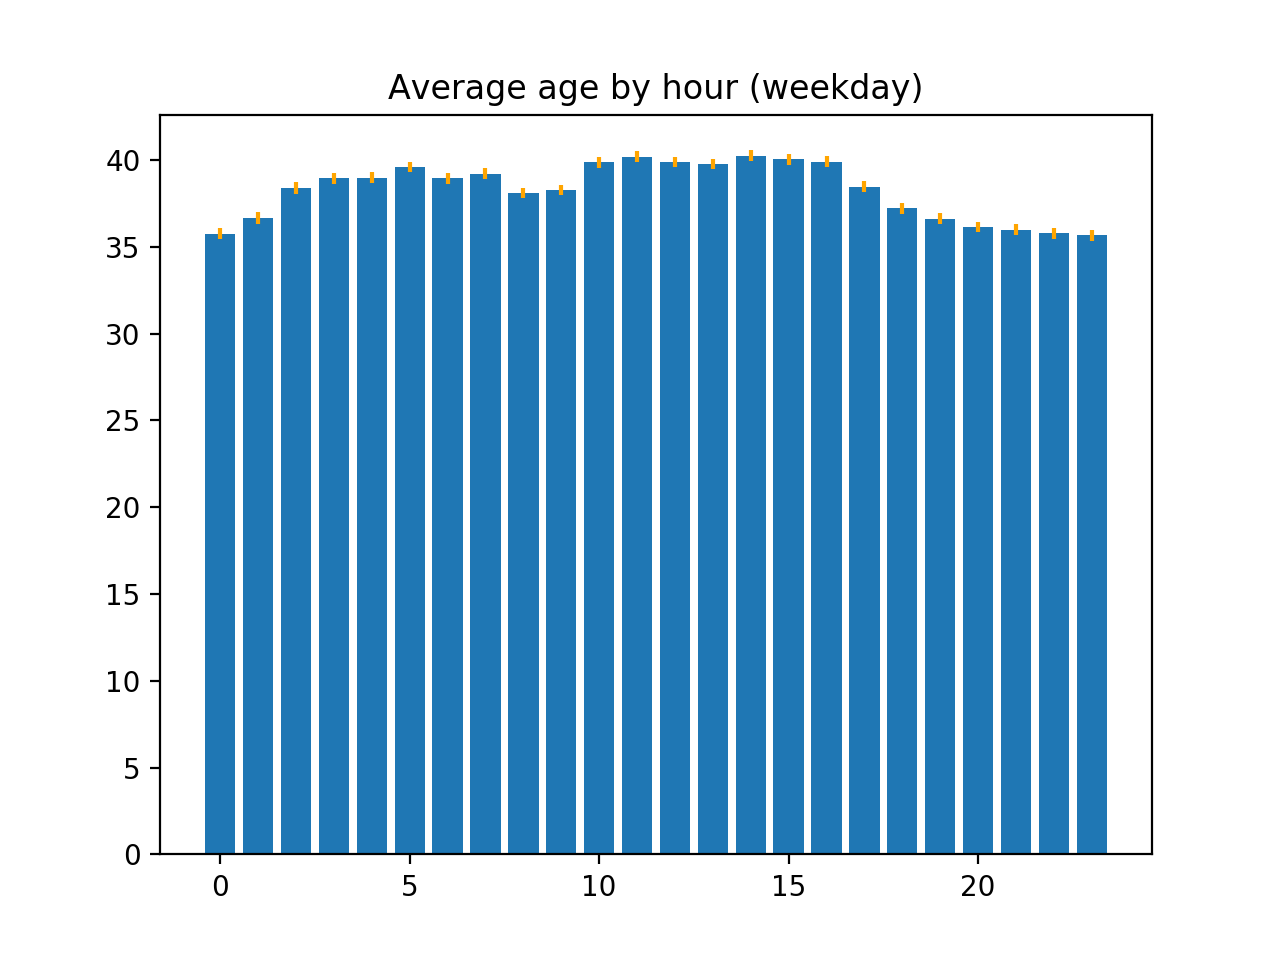

Text(0.5, 1.0, 'Average age by hour (weekday)')

In [50]:
fig = plt.figure()
ax = fig.gca()

avg_age_by_hour = weekday_subs_trips_df.groupby('pickup_hour')['age'].mean()

total_rides_by_hour = weekday_subs_trips_df.groupby('pickup_hour')['age'].count()
#yerror = weekday_subs_trips_df.groupby('pickup_hour')['age'].std()/(total_rides_by_hour)**(1/2)
yerror = weekday_subs_trips_df.groupby('pickup_hour')['age'].std()/avg_age_by_hour #Relative standard deviation instead of std dev of mean

ax.bar(avg_age_by_hour.index,avg_age_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Average age by hour (weekday)')

<IPython.core.display.Javascript object>


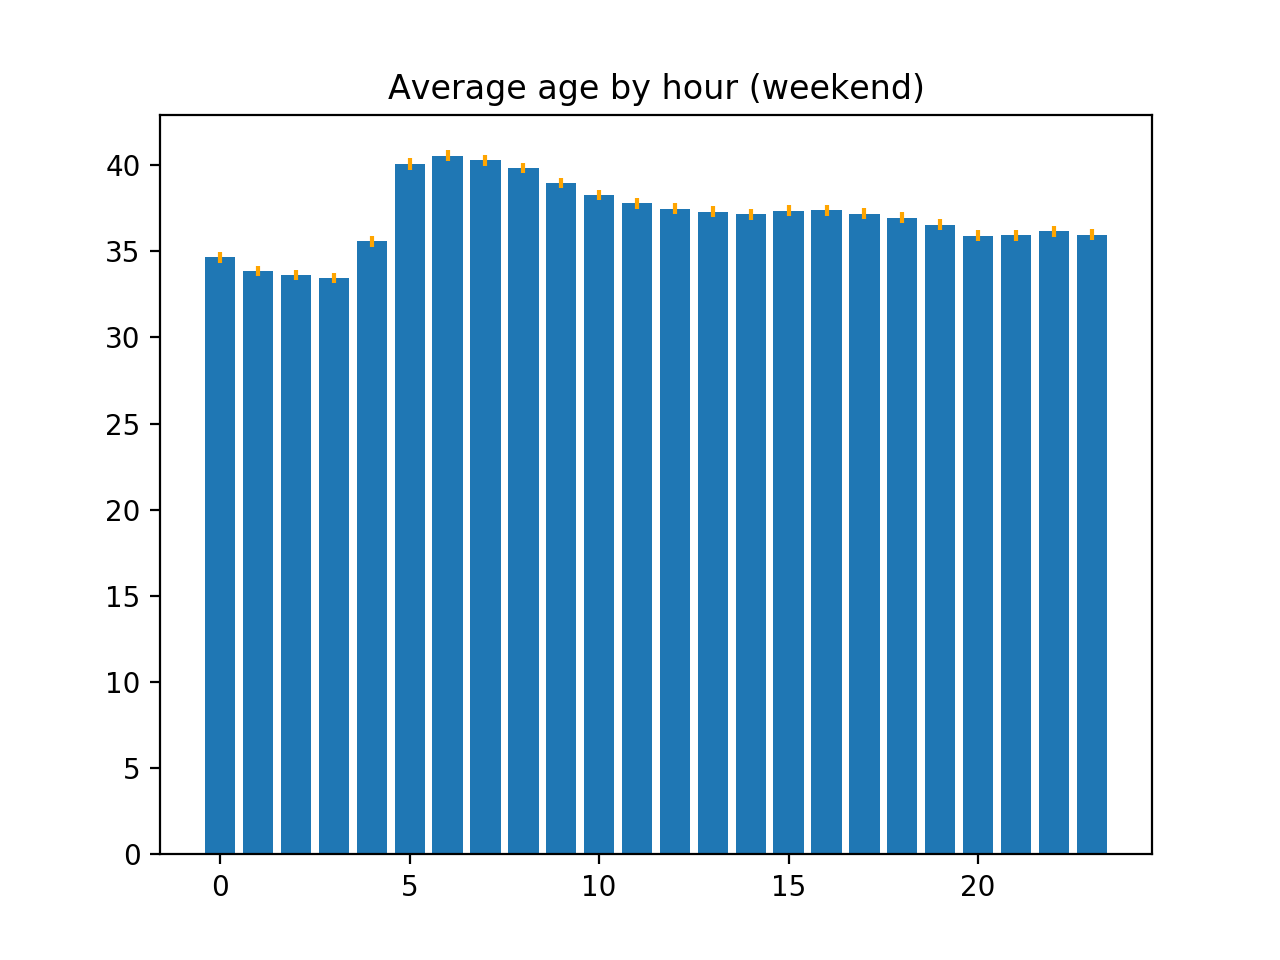

Text(0.5, 1.0, 'Average age by hour (weekend)')

In [73]:
fig = plt.figure()
ax = fig.gca()

avg_age_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['age'].mean()

total_rides_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['age'].count()
#yerror = weekend_subs_trips_df.groupby('pickup_hour')['age'].std()/(total_rides_by_hour)**(1/2)
yerror = weekend_subs_trips_df.groupby('pickup_hour')['age'].std()/avg_age_by_hour

ax.bar(avg_age_by_hour.index,avg_age_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Average age by hour (weekend)')

<IPython.core.display.Javascript object>


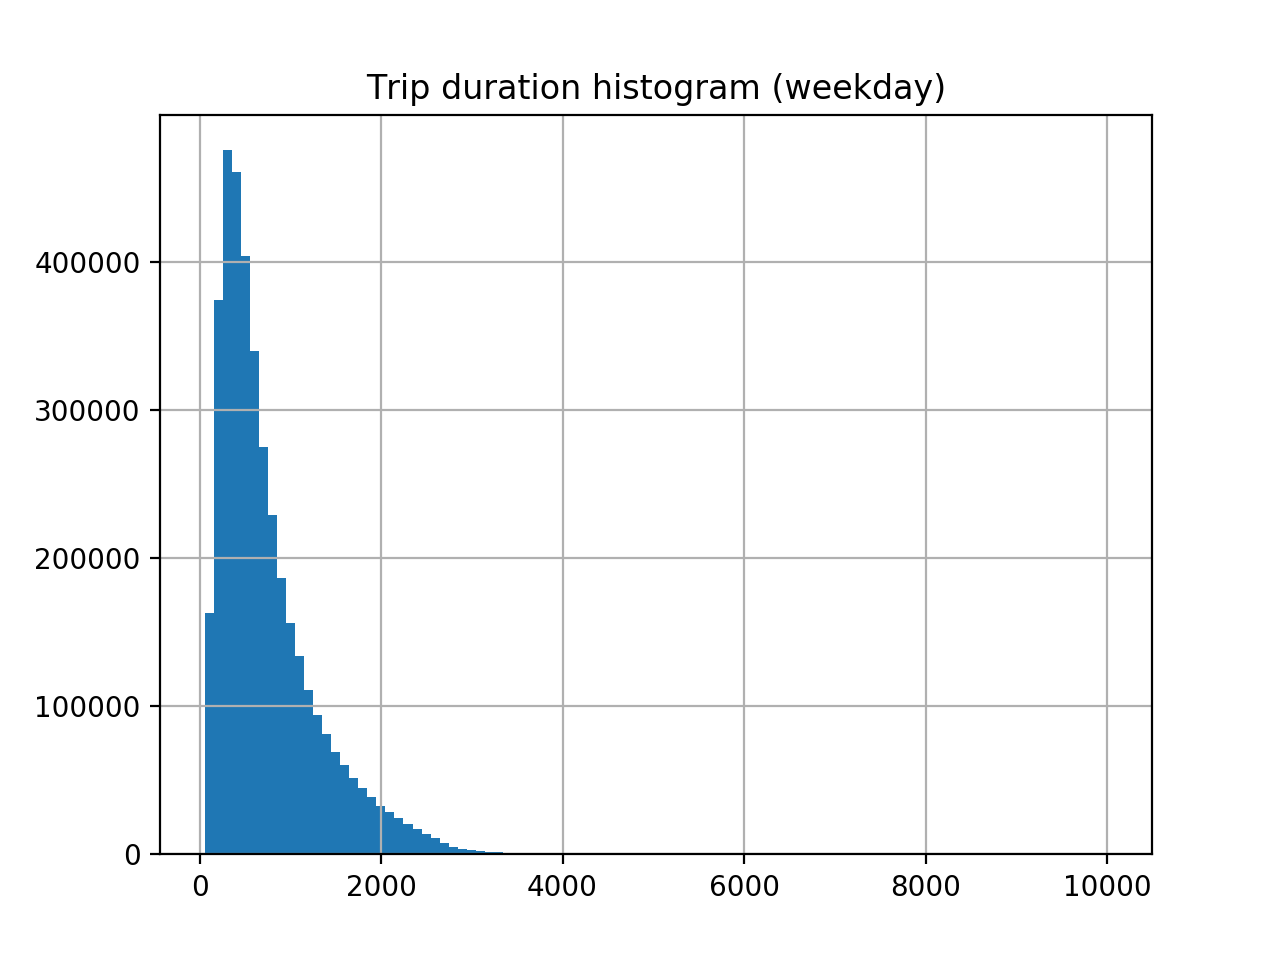

Text(0.5, 1.0, 'Trip duration histogram (weekday)')

In [88]:
fig = plt.figure()
ax = fig.gca()


short_weekday_subs_trips_df  = weekday_subs_trips_df[weekday_subs_trips_df['tripduration'] < 10000]

short_weekday_subs_trips_df['tripduration'].hist(bins=100)

ax.set_title('Trip duration histogram (weekday)')

<IPython.core.display.Javascript object>


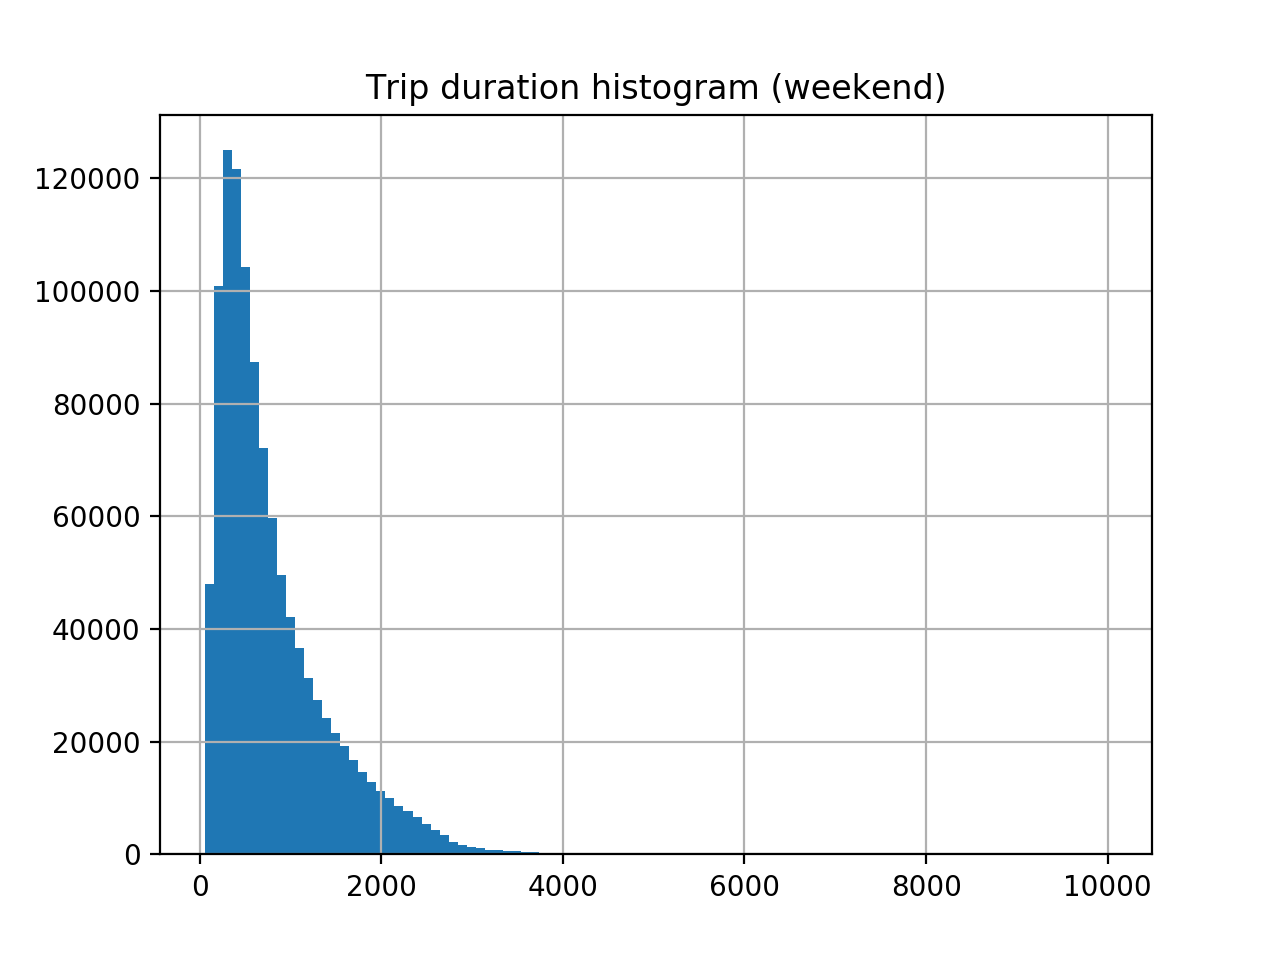

Text(0.5, 1.0, 'Trip duration histogram (weekend)')

In [161]:
fig = plt.figure()
ax = fig.gca()


short_weekend_subs_trips_df  = weekend_subs_trips_df[weekend_subs_trips_df['tripduration'] < 10000]

short_weekend_subs_trips_df['tripduration'].hist(bins=100)

ax.set_title('Trip duration histogram (weekend)')

<IPython.core.display.Javascript object>


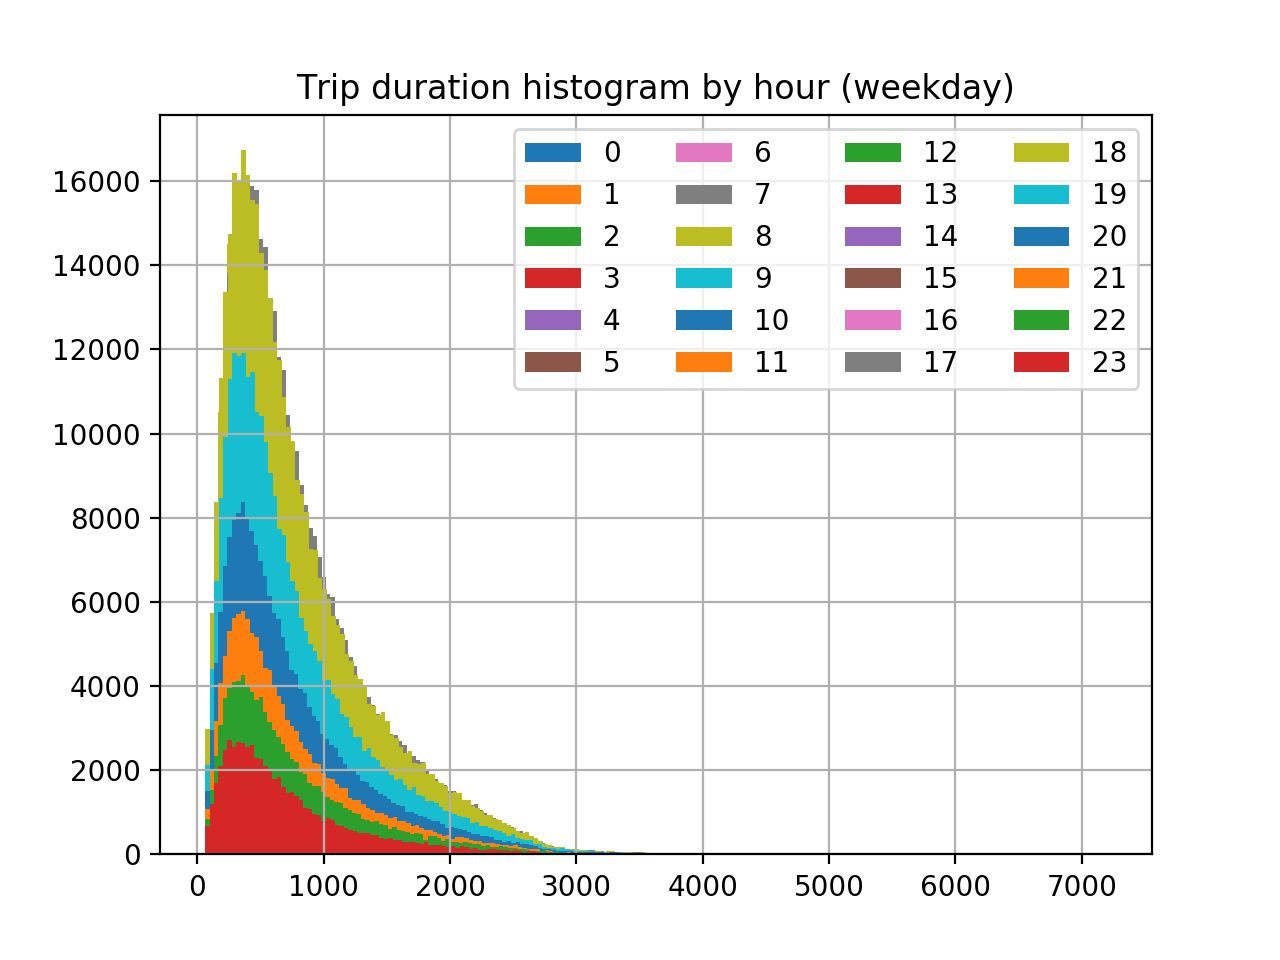

In [160]:
fig = plt.figure()
ax = fig.gca()


short_weekday_subs_trips_df  = weekday_subs_trips_df[weekday_subs_trips_df['tripduration'] < 7200]
duration_by_hour = short_weekday_subs_trips_df.groupby('pickup_hour')['tripduration']

duration_by_hour.hist(bins=200)
#ax.hist(duration_by_hour)

#ax.bar(avg_duration_by_hour.index,avg_duration_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Trip duration histogram by hour (weekday)')
ax.legend(labels = list(range(24)),ncol=4)

<IPython.core.display.Javascript object>


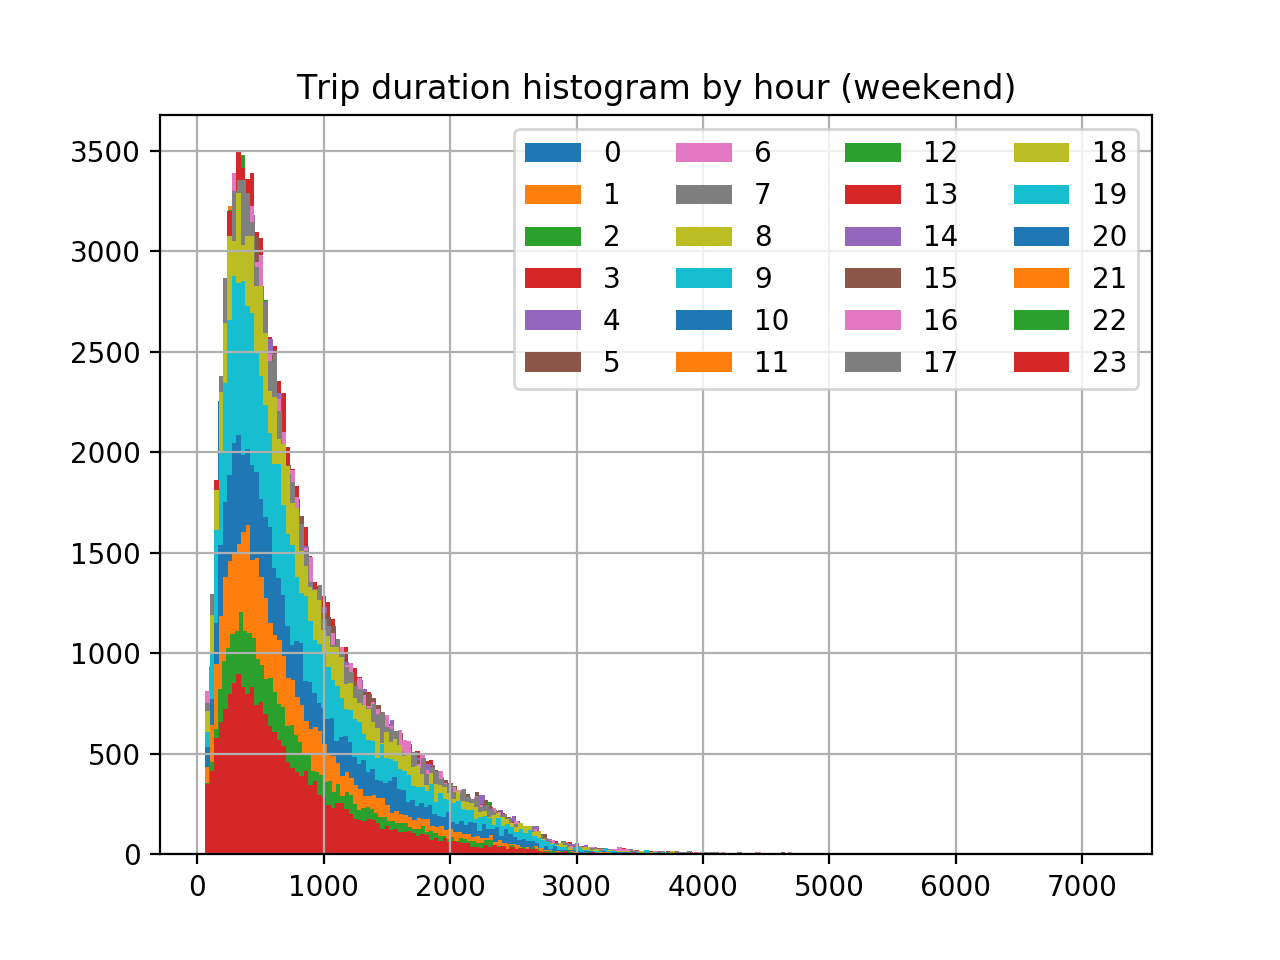

In [141]:
fig = plt.figure()
ax = fig.gca()


short_weekend_subs_trips_df  = weekend_subs_trips_df[weekend_subs_trips_df['tripduration'] < 7200]
duration_by_hour = short_weekend_subs_trips_df.groupby('pickup_hour')['tripduration']

duration_by_hour.hist(bins=200)
#ax.hist(duration_by_hour)

#ax.bar(avg_duration_by_hour.index,avg_duration_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Trip duration histogram by hour (weekend)')
ax.legend(labels = list(range(24)),ncol=4)

<IPython.core.display.Javascript object>


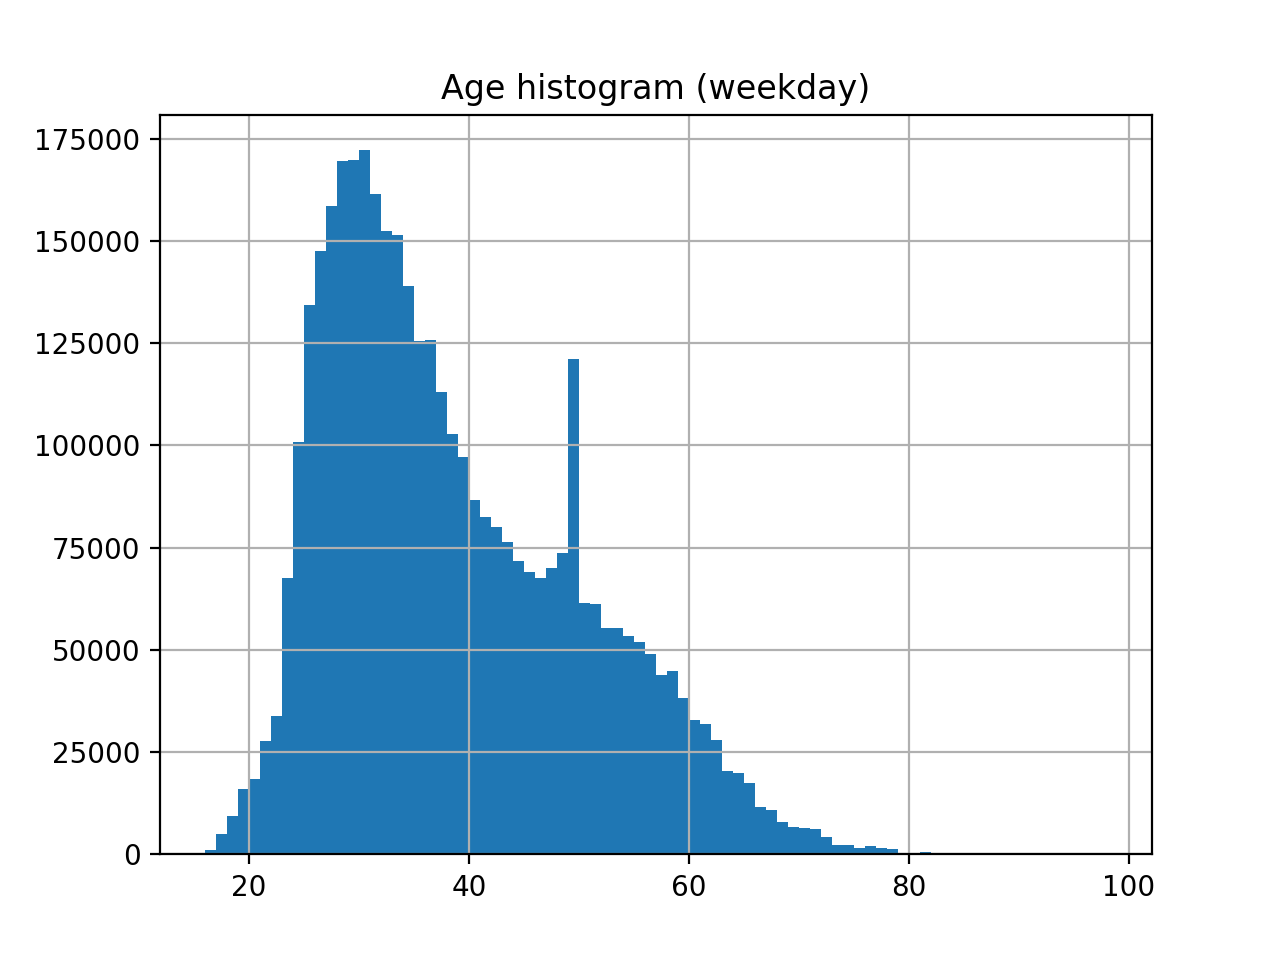

Text(0.5, 1.0, 'Age histogram (weekday)')

In [188]:
fig = plt.figure()
ax = fig.gca()


ages_series  = short_weekday_subs_trips_df[short_weekday_subs_trips_df['age'] < 100]['age']
#duration_by_hour = short_weekend_subs_trips_df.groupby('pickup_hour')['tripduration']

ages_series.hist(bins=list([n for n in range(ages_series.min(),ages_series.max())]))
#ax.hist(duration_by_hour)

#ax.bar(avg_duration_by_hour.index,avg_duration_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Age histogram (weekday)')
#ax.legend(labels = list(range(24)),ncol=4)

In [ ]:
fig = plt.figure()
ax = fig.gca()

avg_age_top_station = weekend_subs_trips_df.groupby('pickup_hour')['age'].mean()

total_rides_by_hour = weekend_subs_trips_df.groupby('pickup_hour')['age'].count()
#yerror = weekend_subs_trips_df.groupby('pickup_hour')['age'].std()/(total_rides_by_hour)**(1/2)
yerror = weekend_subs_trips_df.groupby('pickup_hour')['age'].std()/avg_age_by_hour

ax.bar(avg_age_by_hour.index,avg_age_by_hour,yerr=yerror, ecolor='orange')
ax.set_title('Average age by hour (weekend)')

<IPython.core.display.Javascript object>


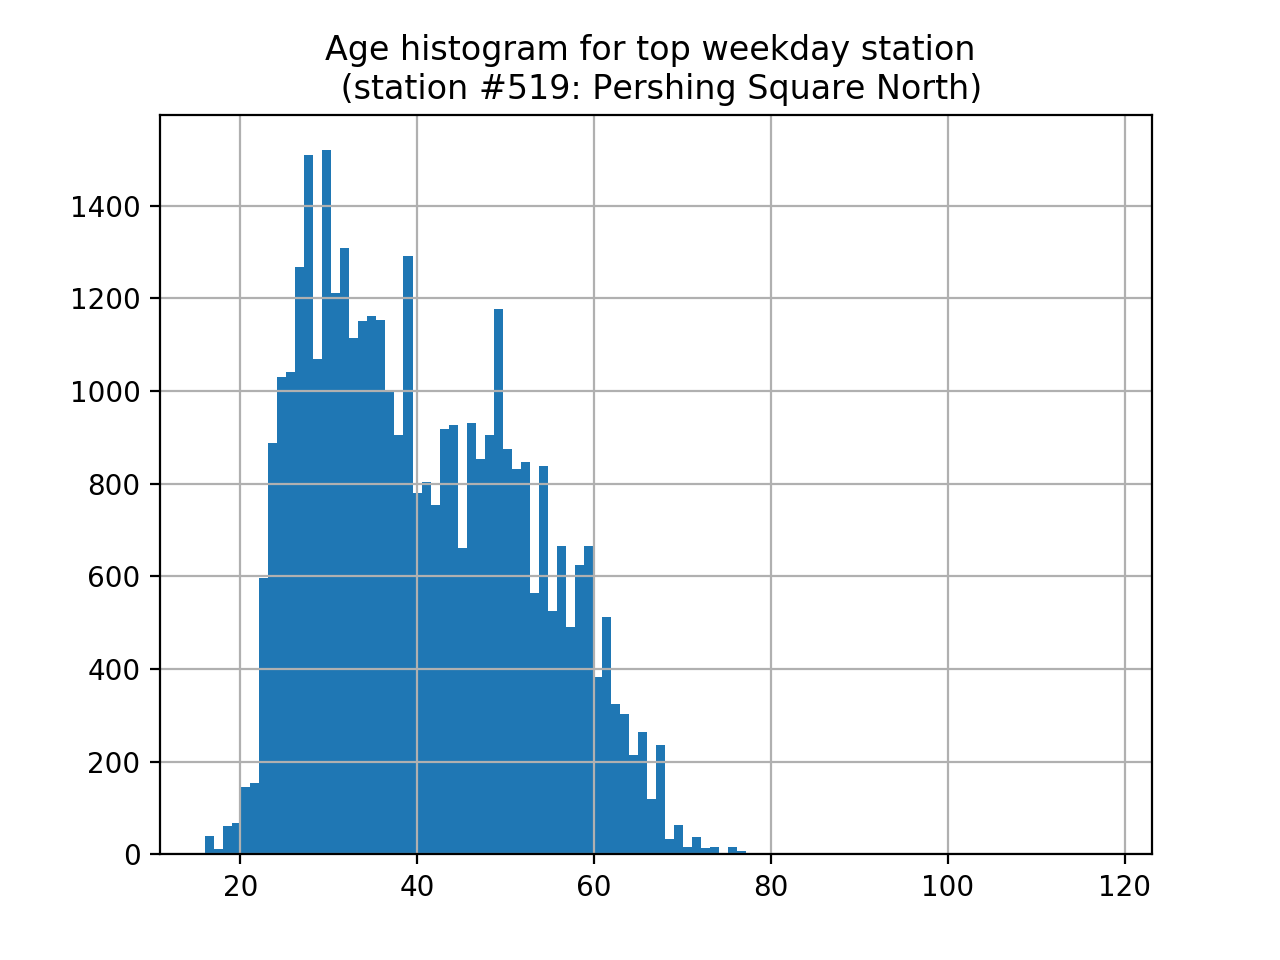

Text(0.5, 1.0, 'Age histogram for top weekday station \n (station #519: Pershing Square North)')

In [186]:
top_station=weekday_subs_trips_df.groupby('start station id')['age'].count().idxmax()

fig = plt.figure()
ax = fig.gca()

age_top_station = weekday_subs_trips_df[weekday_subs_trips_df['start station id']==top_station]['age']

age_top_station.hist(bins=100)

ax.set_title('Age histogram for top weekday station \n (station #{}: {})'.format(top_station,stations_info_df.loc[top_station]['station name']))



<IPython.core.display.Javascript object>


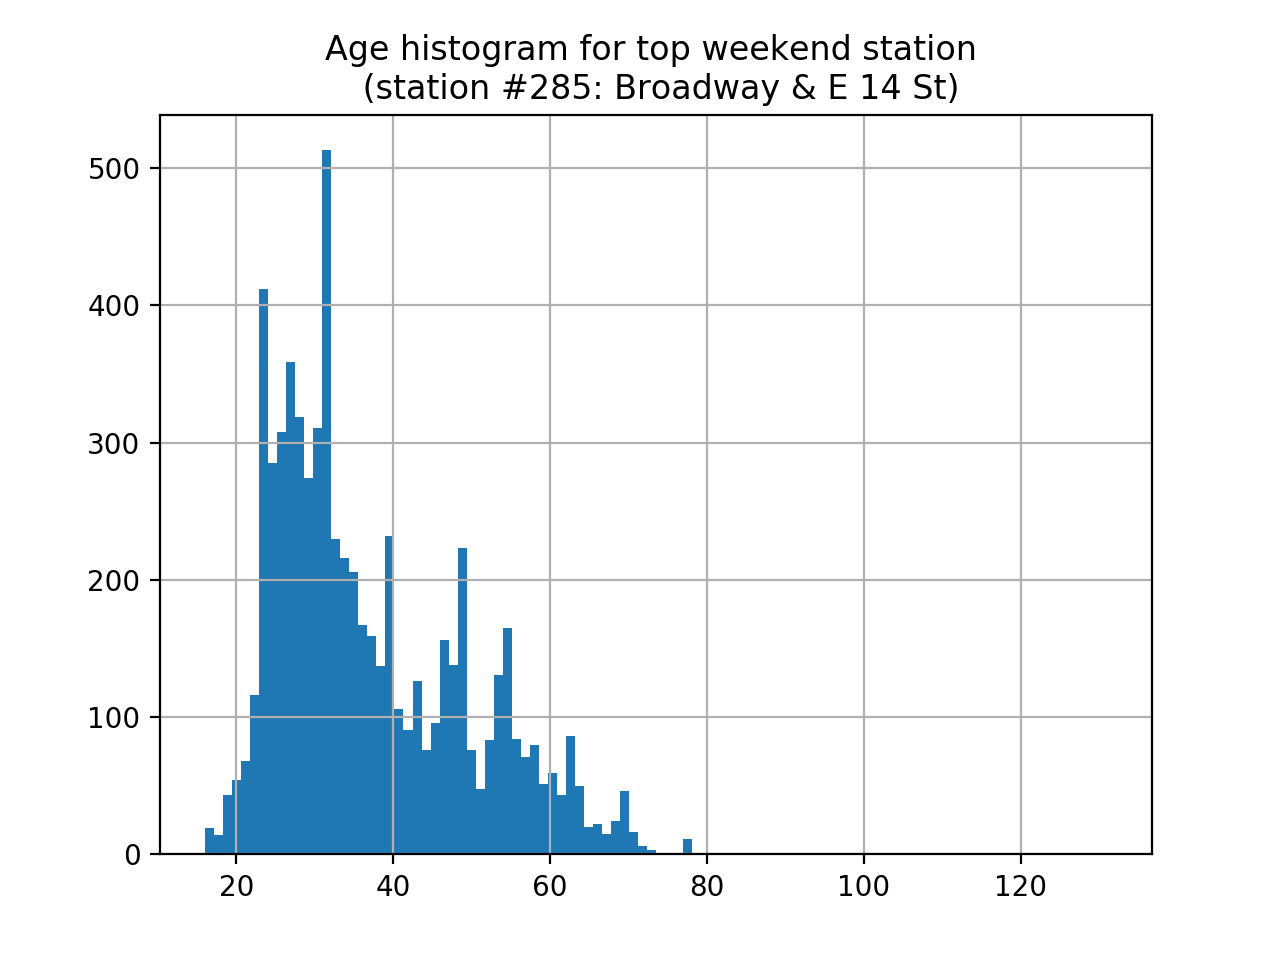

Text(0.5, 1.0, 'Age histogram for top weekend station \n (station #285: Broadway & E 14 St)')

In [185]:
top_station=weekend_subs_trips_df.groupby('start station id')['age'].count().idxmax()

fig = plt.figure()
ax = fig.gca()

age_top_station = weekend_subs_trips_df[weekend_subs_trips_df['start station id']==top_station]['age']

age_top_station.hist(bins=100)

ax.set_title('Age histogram for top weekend station \n (station #{}: {})'.format(top_station,stations_info_df.loc[top_station]['station name']))


<IPython.core.display.Javascript object>


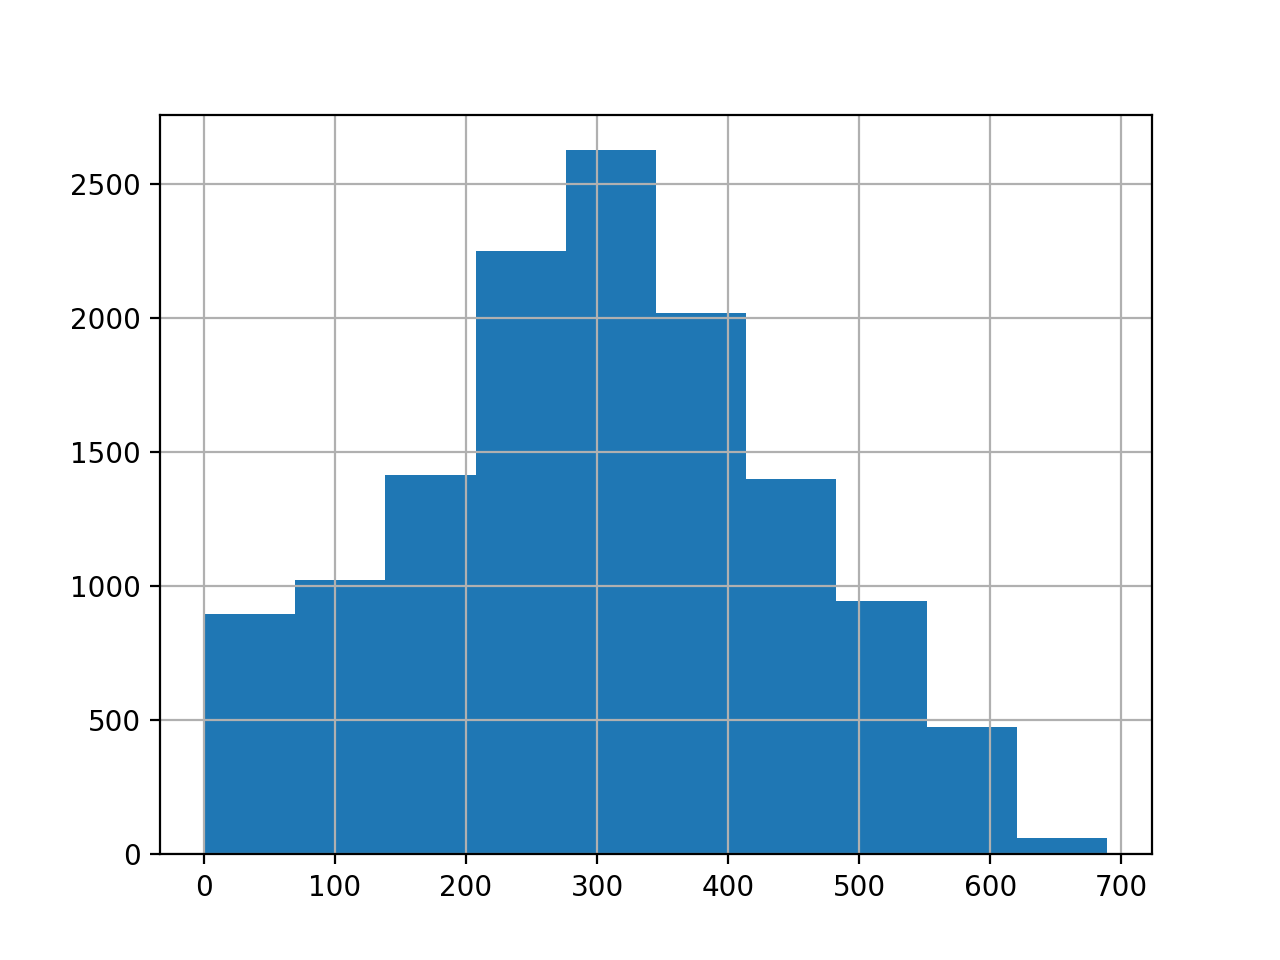

NameError: name 'df' is not defined

In [189]:
plt.figure() 

total_trips_by_hr = df.groupby(['pickup_hour','start_end_station'])['tripduration'].count()
total_trips_by_hr = total_trips_by_hr.rename('total_trips') 

total_trips = df.groupby(['start_end_station'])['tripduration'].count()

max_single_trip_by_hr = total_trips_by_hr.idxmax()[1]
max_total_trips_id = total_trips.idxmax()

top_hourly_trip = total_trips_by_hr.loc[:,max_single_trip_by_hr]
top_total_trip = total_trips_by_hr.loc[:,max_total_trips_id]


plt.bar(top_trip.index,top_trip)
plt.bar(top_total_trip.index,top_total_trip)

<IPython.core.display.Javascript object>


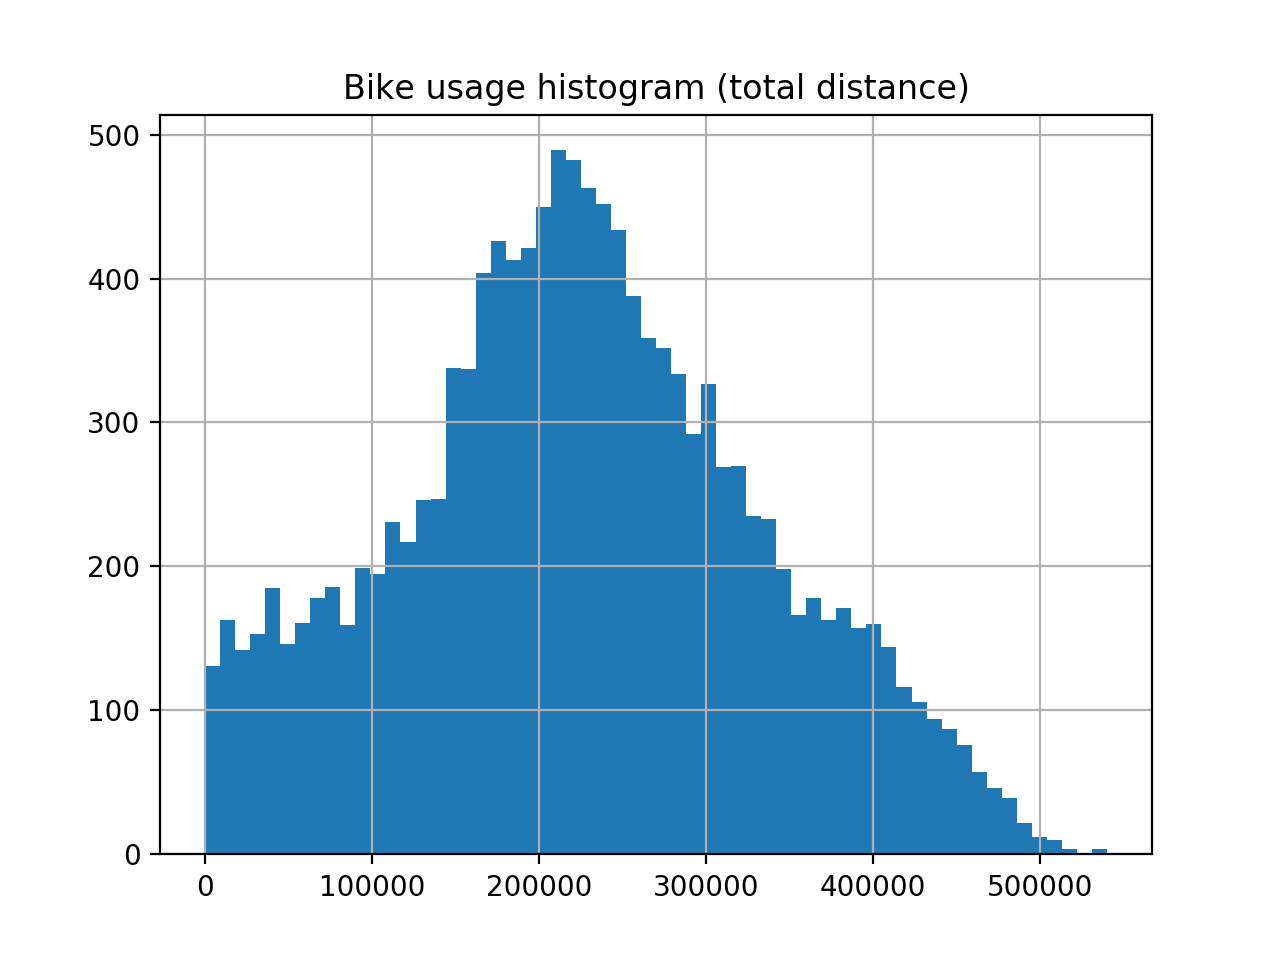

Text(0.5, 1.0, 'Bike usage histogram (total distance)')

In [211]:
fig = plt.figure()
ax = fig.gca()

total_duration_by_bikeid = short_weekday_subs_trips_df.groupby('bikeid')['tripduration'].sum()


total_duration_by_bikeid.hist(bins=60)

ax.set_title('Bike usage histogram (total distance)')

<IPython.core.display.Javascript object>


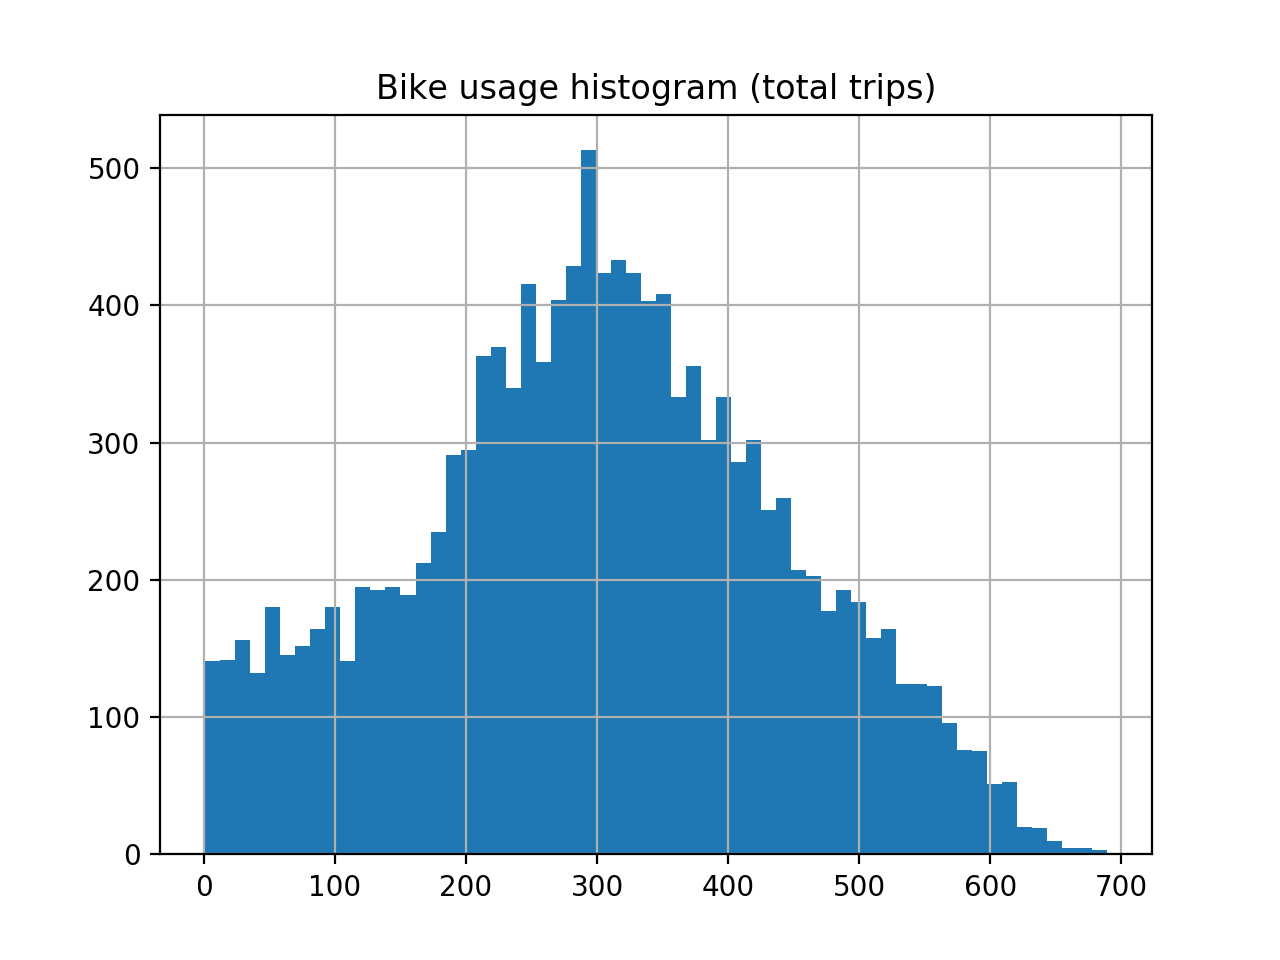

Text(0.5, 1.0, 'Bike usage histogram (total trips)')

In [206]:
fig = plt.figure()
ax = fig.gca()

total_duration_by_bikeid = short_weekday_subs_trips_df.groupby('bikeid')['tripduration'].count()


total_duration_by_bikeid.hist(bins=60)

ax.set_title('Bike usage histogram (total trips)')

In [ ]:
#fig = plt.figure()
#ax = fig.gca()

total_duration_by_bikeid.nlargest(10)

#ax.bar(total_duration_by_bikeid.index,total_duration_by_bikeid)
#ax.set_title('Total use by bike')

In [ ]:
total_trips_by_hr.nlargest(10)
stations_info_df.loc[519]

In [ ]:
max_total_trips_id
max_single_trip_by_hr

# The following creates scatter plots on a map with colors shaded according to station usage

In [47]:
#Create the weekday hourly station cmap dataframe
WD_pickup_groupby = weekday_subs_df.groupby(['pickup_hour', 'start station id'],axis=0)

hourly_pickups_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
hourly_pickups_cmaps_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
WD_max_pickups = WD_pickup_groupby['starttime'].count().max()
WD_max_pickup_cap = WD_pickup_groupby['starttime'].count().sort_values(ascending = False).iloc[4] #Set cap at top 5

WD_dropoff_groupby = weekday_subs_df.groupby(['dropoff_hour', 'start station id'],axis=0)

hourly_dropoffs_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
hourly_dropoffs_cmaps_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
WD_max_dropoffs = WD_dropoff_groupby['starttime'].count().max()
WD_max_dropoff_cap = WD_dropoff_groupby['starttime'].count().sort_values(ascending = False).iloc[4]

cmap = cm.get_cmap('jet')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('afmhot_r')
#cmap = cm.get_cmap('cool')


for num in range(24):
    WD_num_pickups = WD_pickup_groupby['starttime'].count()[num]
    WD_num_dropoffs = WD_dropoff_groupby['starttime'].count()[num]
    
    hourly_pickups_df[num] = WD_num_pickups
    hourly_dropoffs_df[num] = WD_num_dropoffs
    
    hourly_pickups_df = hourly_pickups_df.fillna(0)
    hourly_dropoffs_df = hourly_dropoffs_df.fillna(0)
        
    hourly_pickups_cmaps_df[num] = hourly_pickups_df[num].map(lambda x: cmap(x/WD_max_pickup_cap))
    hourly_dropoffs_cmaps_df[num] = hourly_dropoffs_df[num].map(lambda x: cmap(x/WD_max_dropoff_cap))
    

In [50]:
#Do the same for weekend trips

WE_pickup_groupby = weekend_subs_df.groupby(['pickup_hour', 'start station id'],axis=0)

WE_hourly_pickups_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
WE_hourly_pickups_cmaps_df = pd.DataFrame(index=stations_info_df.index, columns=list(range(24)))
WE_max_pickups = WE_pickup_groupby['starttime'].count().max()
WE_max_pickup_cap = WE_pickup_groupby['starttime'].count().sort_values(ascending = False).iloc[4] # Set cap at top 5

cmap = cm.get_cmap('jet')

for num in range(24):
    WE_num_pickups = WE_pickup_groupby['starttime'].count()[num]
    WE_hourly_pickups_df[num] = WE_num_pickups
    WE_hourly_pickups_df = WE_hourly_pickups_df.fillna(0)
    WE_hourly_pickups_cmaps_df[num] = WE_hourly_pickups_df[num].map(lambda x: cmap(x/WE_max_pickup_cap))
    

In [32]:
# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
import tilemapbase
tilemapbase.start_logging()

In [33]:
NYC_center = (-74.006,40.713)
NYC_center_moves = []

for num in range(5):
    NYC_center_moves.append(tuple([NYC_center[0]+num*.001,NYC_center[1]+num*.001]))

extent = tilemapbase.Extent.from_lonlat(-74.03,-73.91, 40.65, 40.81)

#extent = extent.to_aspect(1)
extent

Extent((0.29436111111111113,0.3756243319633231)->(0.2946944444444445,0.37621083107798253) projected as normal)

In [34]:
t = tilemapbase.tiles.Carto_Light

In [35]:
hour_mark_loc = (-74.02,40.77)
x_cen, y_cen = tilemapbase.project(*hour_mark_loc)

stations = [tilemapbase.project(x,y) for x,y in zip(stations_info_df['lon'], stations_info_df['lat'])]
x, y = zip(*stations)

In [65]:
#Create weekday images
plt.ioff()

for num in range(24):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[num], alpha = .5, s = 100)#, animated=True);
    #plt.annotate('hour = {}'.format(num), [x_cen,y_cen]);
    ax.set_title('hour = {}'.format(num))
        
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
    cbar.ax.set_yticklabels(['0',  '{:.1f} per day'.format(WD_max_pickup_cap/num_WD/2) , '> ' +  '{:.1f} per day'.format(WD_max_pickup_cap/num_WD)])# vertically oriented colorbar
    
    
    plt.savefig('./Images/Summer_2018/Summer_2018_WD_{}.png'.format(str(num)));
    plt.close()
    
for num in range(24):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = hourly_dropoffs_cmaps_df[num], alpha = .5, s = 100)#, animated=True);
       
    #plt.annotate('hour = {}'.format(num), [x_cen,y_cen]);
    
    ax.set_title('hour = {}'.format(num))
    
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
    cbar.ax.set_yticklabels(['0',  '{:.1f} per day'.format(WD_max_dropoff_cap/2/num_WD) , '> ' +  '{:.1f} per day'.format(WD_max_dropoff_cap/num_WD)])# vertically oriented colorbar
    
    plt.savefig('./Images/Summer_2018/Summer_2018_WD_drops_{}.png'.format(str(num)));
    plt.close()

In [63]:
#Create weekend images
plt.ioff()

for num in range(24):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = WE_hourly_pickups_cmaps_df[num], alpha = .5, s = 100)#, animated=True);
       
    #plt.annotate('hour = {}'.format(num), [x_cen,y_cen]);
    
    ax.set_title('Summer 2018, weekend, hour = {}'.format(num))
    
    cax, _ = mpl.colorbar.make_axes(ax)
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
    cbar.ax.set_yticklabels(['0', '{:.1f} per day'.format(WE_max_pickup_cap/2/num_WE) , '> ' + '{:.1f} per day'.format(WE_max_pickup_cap/num_WE)])# vertically oriented colorbar
    
    plt.savefig('./Images/Summer_2018/Summer_2018_WE_{}.png'.format(str(num)));
    


In [66]:
from PIL import Image

#Weekday and weekend image gifs
WD_ims = []
WD_drops_ims = []

WE_ims = []
WE_drops_ims = []

for num in range(24):
    WD_im = Image.open('./Images/Summer_2018/Summer_2018_WD_{}.png'.format(str(num)))
    WD_ims.append(WD_im)
    
    WD_drops_im = Image.open('./Images/Summer_2018/Summer_2018_WD_drops_{}.png'.format(str(num)))
    WD_drops_ims.append(WD_drops_im)
    
    WE_im = Image.open('./Images/Summer_2018/Summer_2018_WE_{}.png'.format(str(num)))
    WE_ims.append(WE_im)

WD_ims[0].save('./Images/Summer_2018/Summer_2018_WD.gif',
               save_all=True,
               append_images=WD_ims[1:],
               duration=600,
               loop=0)

WD_drops_ims[0].save('./Images/Summer_2018/Summer_2018_WD_drops.gif',
               save_all=True,
               append_images=WD_drops_ims[1:],
               duration=600,
               loop=0)

WE_ims[0].save('./Images/Summer_2018/Summer_2018_WE.gif',
               save_all=True,
               append_images=WE_ims[1:],
               duration=600,
               loop=0)


In [ ]:
def plot_station_scatter(df):
    
    station_lats = df['lat']
    station_lons = df['lon']
    station_num_bikes = 100#stations_info_df['totalDocks']
    #'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'
    plt.scatter(station_lons, station_lats, marker = 'h', color ='r', alpha = .5, s = station_num_bikes)

In [ ]:
plt.figure(figsize=(8,8))
station_lats = stations_info_df['lat']
station_lons = stations_info_df['lon']
station_num_bikes = 100#stations_info_df['totalDocks']
#'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'
plt.scatter(station_lons, station_lats, marker = 'h', color = hourly_pickups_cmaps_df[6], alpha = .7, s = station_num_bikes)

mplleaflet.display(tiles='cartodb_positron')

In [ ]:
#list(zip(stations_info_df['lon'],stations_info_df['lat']))
#stations = [tilemapbase.project(x,y) for x,y in zip(stations_info_df['lon'], stations_info_df['lat'])]
#x, y = zip(*path)
#ax.scatter(x, y)
#x, y = tilemapbase.project(stations_info_df['lon'],stations_info_df['lat'])

In [ ]:
%matplotlib notebook
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x_cen, y_cen = tilemapbase.project(*NYC_center)
stations = [tilemapbase.project(x,y) for x,y in zip(stations_info_df['lon'], stations_info_df['lat'])]
x, y = zip(*stations)


#ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[6], alpha = .7, s = 100)

ims = []
for num in range(24):
    im = ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[num], alpha = .7, s = 100, animated=True)
    #im = plt.imshow(f(x, y), animated=True)
    plt.annotate('n = {}'.format(num), [x_cen,y_cen])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500)#, blit=False,repeat_delay=1000)

plt.show()
None

In [ ]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    #if curr == 23: 
    #    a.event_source.stop()
    plt.cla()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[curr], alpha = .5, s = 100)#, animated=True)
     
    plt.annotate('hour = {}'.format(curr), [x_cen,y_cen])
    
    

In [ ]:
#Create weekday images
plt.ioff()

for num in range(24):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[num], alpha = .5, s = 100)#, animated=True);
       
    plt.annotate('hour = {}'.format(num), [x_cen,y_cen]);
    
    plt.savefig('./Images/Jun_2018/Jun_2018_WD_{}.png'.format(str(num)));

    

In [ ]:
#Create weekend images
plt.ioff()

for num in range(24):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax, t)
    
    ax.scatter(x,y, marker = 'h', color = WE_hourly_pickups_cmaps_df[num], alpha = .5, s = 100)#, animated=True);
       
    plt.annotate('hour = {}'.format(num), [x_cen,y_cen]);
    
    plt.savefig('./Images/Jun_2018/Jun_2018_WE_{}.png'.format(str(num)));

    

In [ ]:
from PIL import Image

#Weekday and weekend image gifs
WD_ims = []
WE_ims = []

for num in range(24):
    WD_im = Image.open('./Images/Jun_2018/Jun_2018_WD_{}.png'.format(str(num)))
    WD_ims.append(WD_im)
    WE_im = Image.open('./Images/Jun_2018/Jun_2018_WE_{}.png'.format(str(num)))
    WE_ims.append(WE_im)

WD_ims[0].save('./Images/Jun_2018/Jun_2018_WD.gif',
               save_all=True,
               append_images=WD_ims[1:],
               duration=600,
               loop=0)

WE_ims[0].save('./Images/Jun_2018/Jun_2018_WE.gif',
               save_all=True,
               append_images=WD_ims[1:],
               duration=600,
               loop=0)


In [ ]:
%matplotlib notebook
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

a = animation.FuncAnimation(fig, update, interval=500,frames = 24,repeat =True)


writer = PillowWriter(fps=2)
a.save("./animation.gif", writer=writer)


In [ ]:
from PIL import Image

ims = []

for num in range(24):
    im = Image.open('./Images/Nov_2018/Nov_2018_{}.png'.format(str(num)))
    ims.append(im)

ims[0].save('./Images/Nov_2018/Nov_2018_WD.gif',
               save_all=True,
               append_images=ims[1:],
               duration=600,
               loop=0)

In [ ]:
#Check number of trips less than 1 minute
print(len(subs_df))
print(len(subs_df[subs_df['tripduration'] <60]))

In [ ]:
# starttime column is total trips
df_groupBy = subs_df.groupby(['start station id','Trip_Type'],axis=0)
trips_ser = df_groupBy['starttime'].count()
trips_ser.sort_values(ascending = False)

In [ ]:
# starttime column is total trips
df_groupBy = subs_df.groupby(['start_end_station','Trip_Type'],axis=0)
trips_ser = df_groupBy['starttime'].count()
trips_ser.sort_values(ascending = False)
#trips_ser_test.head()


top_ser = trips_ser.sort_values(ascending = False)
top_df = top_ser.reset_index()

top_df['Trips per Day'] = (
    np.select(
        condlist=[top_df['Trip_Type'] == 'Weekend',top_df['Trip_Type'] == 'Commuter',top_df['Trip_Type'] == 'Daytime Errand',top_df['Trip_Type'] == 'Late Night'], #Input the conditions in order from lowest to highest?
        choicelist=[top_df['starttime']/8/24,top_df['starttime']/20/8,top_df['starttime']/20/6,top_df['starttime']/20/10]))

print(top_df[top_df['Trips per Day'] == 0])

top_df.rename({'starttime': 'Total Trips'},axis=1,inplace=True)

In [ ]:
top_df = top_df.sort_values(['Trips per Day'],ascending=False)
top_df.reset_index(inplace=True)
top_df.drop(['index'],inplace=True,axis=1)

In [ ]:
#Boolean series to choose the different trip types
Weekend_bool = top_df['Trip_Type'] == 'Weekend'
Commuter_bool = top_df['Trip_Type'] == 'Commuter'
Daytime_Errand_bool  = top_df['Trip_Type'] == 'Daytime Errand'
Late_Night_bool = top_df['Trip_Type'] == 'Late Night'
Trip_type_bool_list = [Weekend_bool, Commuter_bool, Daytime_Errand_bool, Late_Night_bool]

#Dataframes restricted to each trip type
top_DE_df = top_df[Daytime_Errand_bool]
top_DE_df.reset_index(inplace = True)
top_DE_df.rename({'index': 'Total Rank'},axis=1,inplace=True)

top_WE_df = top_df[Weekend_bool]
top_WE_df.reset_index(inplace = True)
top_WE_df.rename({'index': 'Total Rank'},axis=1,inplace=True)

top_CM_df = top_df[Commuter_bool]
top_CM_df.reset_index(inplace = True)
top_CM_df.rename({'index': 'Total Rank'},axis=1,inplace=True)

top_LN_df = top_df[Late_Night_bool]
top_LN_df.reset_index(inplace = True)
top_LN_df.rename({'index': 'Total Rank'},axis=1,inplace=True)

In [ ]:
top_5000_ser = top_df[Daytime_Errand_bool][:5000]

In [ ]:
#df_groupBy = subs_df.groupby('start_end_station',axis=0)
#trips_ser = df_groupBy['starttime'].count()
#Check that trips_ser includes all trips in df
#print(trips_ser.sum() == len(subs_df))
#print(len(trips_ser))
#top_5000_ser = trips_ser.sort_values(ascending = False)[0:5000]

In [ ]:
color_dict = {'Commuter': 'green', 'Late Night': 'red', 'Daytime Errand': 'blue', 'Weekend':'orange'}
color_ser = top_5000_ser['Trip_Type'].map(lambda x: color_dict[x])

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from matplotlib import cm


def leaflet_plot_stations():

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

plt.figure(figsize=(8,8))

num_pairs = 200

cmap = cm.get_cmap('jet')

#max_trips = top_5000_ser.iloc[0]['starttime']

color_dict = {'Commuter': 'green', 'Late Night': 'black', 'Daytime Errand': 'red', 'Weekend': 'blue'}
color_ser = top_WE_df['Trip_Type'].map(lambda x: color_dict[x])


for num in top_WE_df.index[:num_pairs]:
        
    item = top_WE_df.iloc[num]['start_end_station']
    
        
    startlat = stations_info_df.loc[item[0]]['lat']
    endlat = stations_info_df.loc[item[1]]['lat']
    lats = [startlat, endlat]
    
    startlon = stations_info_df.loc[item[0]]['lon']
    endlon = stations_info_df.loc[item[1]]['lon']
    lons = [startlon,endlon]
    
    trip_color = color_ser[num]
    
    plt.plot(lons, lats, color = color_ser[num],linewidth = 2, alpha = .3)
        #color = cmap(top_5000_ser.iloc[num]['starttime']/max_trips),linewidth = 2, alpha = .3) # Draw blue line
        #top_5000_ser[item]/max_trips),linewidth = 2, alpha = .3) # Draw blue line
    
    #cmap(top_2000_ser[item]/max_trips * 0.2)
    


station_lats = stations_info_df['lat']
station_lons = stations_info_df['lon']
station_num_bikes = 2#stations_info_df['totalDocks']

plt.scatter(station_lons, station_lats, color ='r', alpha = .5, s = station_num_bikes)
    
#mplleaflet.display(tiles='cartodb_positron')#,closefig=False)

mplleaflet.display(tiles='cartodb_positron')
    

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from matplotlib import cm


def leaflet_plot_stations():

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

plt.figure(figsize=(8,8))

num_pairs = 200

cmap = cm.get_cmap('jet')

#max_trips = top_5000_ser.iloc[0]['starttime']

color_dict = {'Commuter': 'green', 'Late Night': 'black', 'Daytime Errand': 'red', 'Weekend': 'blue'}
color_ser = top_CM_df['Trip_Type'].map(lambda x: color_dict[x])


for num in top_CM_df.index[:num_pairs]:
        
    item = top_CM_df.iloc[num]['start_end_station']
    
        
    startlat = stations_info_df.loc[item[0]]['lat']
    endlat = stations_info_df.loc[item[1]]['lat']
    lats = [startlat, endlat]
    
    startlon = stations_info_df.loc[item[0]]['lon']
    endlon = stations_info_df.loc[item[1]]['lon']
    lons = [startlon,endlon]
    
    trip_color = color_ser[num]
    
    plt.plot(lons, lats, color = color_ser[num],linewidth = 2, alpha = .3)
        #color = cmap(top_5000_ser.iloc[num]['starttime']/max_trips),linewidth = 2, alpha = .3) # Draw blue line
        #top_5000_ser[item]/max_trips),linewidth = 2, alpha = .3) # Draw blue line
    
    #cmap(top_2000_ser[item]/max_trips * 0.2)
    


station_lats = stations_info_df['lat']
station_lons = stations_info_df['lon']
station_num_bikes = 2#stations_info_df['totalDocks']

plt.scatter(station_lons, station_lats, color ='r', alpha = .5, s = station_num_bikes)
    
mplleaflet.display(tiles='cartodb_positron')

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from matplotlib import cm


def leaflet_plot_stations():

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

plt.figure(figsize=(8,8))

num_pairs = 200

cmap = cm.get_cmap('jet')

#max_trips = top_5000_ser.iloc[0]['starttime']

color_dict = {'Commuter': 'green', 'Late Night': 'black', 'Daytime Errand': 'red', 'Weekend': 'blue'}
color_ser = top_LN_df['Trip_Type'].map(lambda x: color_dict[x])


for num in top_LN_df.index[:num_pairs]:
        
    item = top_LN_df.iloc[num]['start_end_station']
    
        
    startlat = stations_info_df.loc[item[0]]['lat']
    endlat = stations_info_df.loc[item[1]]['lat']
    lats = [startlat, endlat]
    
    startlon = stations_info_df.loc[item[0]]['lon']
    endlon = stations_info_df.loc[item[1]]['lon']
    lons = [startlon,endlon]
    
    trip_color = color_ser[num]
    
    plt.plot(lons, lats, color = color_ser[num],linewidth = 2, alpha = .3)
        #color = cmap(top_5000_ser.iloc[num]['starttime']/max_trips),linewidth = 2, alpha = .3) # Draw blue line
        #top_5000_ser[item]/max_trips),linewidth = 2, alpha = .3) # Draw blue line
    
    #cmap(top_2000_ser[item]/max_trips * 0.2)
    


station_lats = stations_info_df['lat']
station_lons = stations_info_df['lon']
station_num_bikes = 2#stations_info_df['totalDocks']

plt.scatter(station_lons, station_lats, color ='r', alpha = .5, s = station_num_bikes)
    
mplleaflet.display(tiles='cartodb_positron')

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from matplotlib import cm


plt.figure(figsize=(8,8))

num_pairs = 200

#cmap = cm.get_cmap('jet')

#max_trips = top_5000_ser.iloc[0]['starttime']

color_dict = {'Commuter': 'green', 'Late Night': 'black', 'Daytime Errand': 'orange', 'Weekend': 'blue'}
color_ser = top_DE_df['Trip_Type'].map(lambda x: color_dict[x])


for num in top_DE_df.index[:num_pairs]:
        
    item = top_DE_df.iloc[num]['start_end_station']
    
        
    startlat = stations_info_df.loc[item[0]]['lat']
    endlat = stations_info_df.loc[item[1]]['lat']
    lats = [startlat, endlat]
    
    startlon = stations_info_df.loc[item[0]]['lon']
    endlon = stations_info_df.loc[item[1]]['lon']
    lons = [startlon,endlon]
    
    trip_color = color_ser[num]
    
    plt.plot(lons, lats, color = color_ser[num],linewidth = 2, alpha = .3)
        #color = cmap(top_5000_ser.iloc[num]['starttime']/max_trips),linewidth = 2, alpha = .3) # Draw blue line
        #top_5000_ser[item]/max_trips),linewidth = 2, alpha = .3) # Draw blue line
    
    #cmap(top_2000_ser[item]/max_trips * 0.2)
    


    
    
#mplleaflet.display(tiles='cartodb_positron',closefig=False)
mplleaflet.display(tiles='cartodb_positron')

In [ ]:
def plot_trips(df, num_pairs, color_dict, stations_df = stations_info_df):

    color_ser = df['Trip_Type'].map(lambda x: color_dict[x])
    top_pairs = df[df['Total Rank']  < 10]
    color_ser.iloc[top_pairs.index] = 'red'
    
    alpha_ser = df['Trip_Type'].map(lambda x: .3)
    alpha_ser.iloc[top_pairs.index] = 1

    for num in df.index[:num_pairs]:
        
        item = df.iloc[num]['start_end_station']
    
        startlat = stations_df.loc[item[0]]['lat']
        endlat = stations_df.loc[item[1]]['lat']
        lats = [startlat, endlat]
    
        startlon = stations_df.loc[item[0]]['lon']
        endlon = stations_df.loc[item[1]]['lon']
        lons = [startlon,endlon]
    
        trip_color = color_ser[num]
    
        plt.plot(lons, lats, color = color_ser[num],linewidth = 2, alpha=alpha_ser[num])
        
def plot_station_scatter(df):
    
    station_lats = df['lat']
    station_lons = df['lon']
    station_num_bikes = 100#stations_info_df['totalDocks']
    #'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'
    plt.scatter(station_lons, station_lats, marker = 'h', color ='r', alpha = .5, s = station_num_bikes)

In [ ]:
top_CM_df.iloc[:200]
top_WE_df.iloc[:200]
top_LN_df.iloc[:200]
top_DE_df.iloc[:200]

merge1 = pd.merge(top_CM_df.iloc[:200],top_WE_df.iloc[:200],on='start_end_station',how='inner')
merge2 = pd.merge(merge1,top_LN_df.iloc[:200],on='start_end_station',how='inner')
pd.merge(merge2,top_DE_df.iloc[:200],on='start_end_station',how='inner')



In [ ]:
plt.figure(figsize=(8,8))

color_dict = {'Commuter': 'green', 'Late Night': 'black', 'Daytime Errand': 'orange', 'Weekend': 'blue'}
num_pairs = 200

#plot_trips(top_LN_df,num_pairs,color_dict)
#plot_trips(top_DE_df,num_pairs,color_dict)
plot_trips(top_CM_df,num_pairs,color_dict)
#plot_trips(top_WE_df,num_pairs,color_dict)
plot_station_scatter(stations_info_df)

mplleaflet.display(tiles='cartodb_positron')

In [ ]:
CM_200_df = top_CM_df.iloc[:200]
CM_200_df.set_index('start_end_station',inplace=True)
WE_200_df = top_WE_df.iloc[:200]
DE_200_df = top_DE_df.iloc[:200]
LN_200_df = top_LN_df.iloc[:200]



In [ ]:
np.select(
        condlist=[WE_200_df['start_end_station'] not in CM_200_df.index], #Input the conditions in order from lowest to highest?
        choicelist=[WE_200_df['start_end_station'] ])#, 
        #default= None)

In [ ]:
?np.select

In [ ]:
WE_200_df[WE_200_df['start_end_station'] not in CM_200_df.index]

In [ ]:
st_df.map(lambda x: int(x[-13:-11]))
WE_200_df[WE_200_df['start_end_station'].map(lambda x: x not in CM_200_df.index)]

In [ ]:
color_ser = top_WE_df['Trip_Type'].map(lambda x: color_dict[x])
top_pairs = top_WE_df[top_WE_df['Total Rank']  < 10]
color_ser.iloc[top_pairs.index] = 'black'

color_ser

alpha_ser = top_WE_df['Trip_Type'].map(lambda x: .3)
alpha_ser.iloc[top_pairs.index] = 1
alpha_ser

In [ ]:
print(CM_200_df.head(2))
print(DE_200_df.head(2))
print(WE_200_df.head(2))
print(LN_200_df.head(2))

In [ ]:
top_CM_df[top_CM_df['start_end_station'] == (3182,3254)]


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
    
n = 100
x = np.random.randn(n)
#animation.FuncAnimation?
plt.cla?
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=10)

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

In [ ]:
plt.imshow?

In [ ]:
from string import ascii_letters
import seaborn as sns


sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr

In [ ]:
import copy
from matplotlib.colors import LogNorm

def density_map(latitudes, longitudes, center, bins=100, radius=0.1):  
    cmap = copy.copy(plt.cm.jet)
    cmap.set_bad((0,0,0))  # Fill background with black

    # Center the map around the provided center coordinates
    histogram_range = [
        [center[1] - .7*radius, center[1] + 1.3*radius],
        [center[0] - .8*radius, center[0] + 1.2*radius]
    ]
    
    fig = plt.figure(figsize=(5,5))
    plt.hist2d(longitudes, latitudes, bins=bins, norm=LogNorm(),
               cmap=cmap, range=histogram_range)

    # Remove all axes and annotations to keep the map clean and simple
    plt.grid('off')
    plt.axis('off')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [ ]:
density_map(df['start station latitude'],df['start station longitude'],center = (40.713,-74.006))

In [ ]:
density_map(weekday_subs_df['start station latitude'],weekday_subs_df['start station longitude'],center = (40.713,-74.006))
density_map(weekend_subs_df['start station latitude'],weekend_subs_df['start station longitude'],center = (40.713,-74.006))

In [ ]:
print(len(subs_df))
len(df)

In [ ]:
from matplotlib import gridspec


fig, axs = plt.subplots(nrows = 4, ncols = 6, figsize=(12, 12))
axs = axs.flatten()
#gs  = gridspec.GridSpec(4, 1, height_ratios=[1, 1 ,1.5, 1])

plt.subplots_adjust(hspace = .001)

for img, ax in zip(WD_ims, axs):
    ax.imshow(img)
    #ax.set_frame_on(False)
    ax.axis('off')
    
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(img, cax=cbar_ax)
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
cbar.ax.set_yticklabels(['0', str(max_pickup_cap/2) , '> ' + str(max_pickup_cap)])# vertically oriented colorbar
    
#cax, _ = mpl.colorbar.make_axes(ax)
#cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
#cbar.ax.set_yticklabels(['0', str(max_pickup_cap/2) , '> ' + str(max_pickup_cap)])# vertically oriented colorbar
    

#for ax in axes.flat:
#    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

#fig.subplots_adjust(right=0.8)

#cax, _ = mpl.colorbar.make_axes(fig)
#cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
#cbar.ax.set_yticklabels(['0', str(max_pickup_cap/2) , '> ' + str(max_pickup_cap)])# vertically oriented colorbar
    


In [ ]:
x_cen, y_cen = tilemapbase.project(*NYC_center)
stations = [tilemapbase.project(x,y) for x,y in zip(stations_info_df['lon'], stations_info_df['lat'])]
x, y = zip(*stations)


In [ ]:
%matplotlib inline

fig, ax = plt.subplots(nrows = 4, ncols =6, figsize=(24,18), dpi=100)
ax = ax.flatten()
plt.subplots_adjust(wspace = .2)

for num in range(24):
    
    ax[num].axis('off')
    #ax[num].xaxis.set_visible(False)
    #ax[num].yaxis.set_visible(False)
    
    if num == 0:
        ax[num].set_title('{} AM'.format(str(12)))
    elif num == 12:
        ax[num].set_title('{} PM'.format(str(12)))
    elif num < 12:
        ax[num].set_title('{} AM'.format(str(num % 12)))
    else:
        ax[num].set_title('{} PM'.format(str(num % 12)))

    plotter = tilemapbase.Plotter(extent, t, width=600)
    plotter.plot(ax[num], t)
    
    ax[num].scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[num], alpha = .7, s = 2.5)#, animated=True);
    #ax[num].annotate('hour = {}'.format(num), [x_cen,y_cen]);
        
cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
cbar.ax.set_yticklabels(['0', str(max_pickup_cap/2) , '> ' + str(max_pickup_cap)])# vertically oriented colorbar
    
    
plt.savefig('./Images/Jun_2018/Jun_2018_WD_grid.png');

In [ ]:
%matplotlib notebook

from matplotlib.widgets import Button

freqs = 24

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
plt.subplots_adjust(bottom=0.2)
plt.ion()

ax.set_title('hour = {}'.format(0))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)
   
scatter_plot = ax.scatter(x,y, marker = 'h', color = hourly_pickups_cmaps_df[0], alpha = .5, s = 50)#, animated=True);
#hour = plt.annotate('hour = {}'.format(0), [x_cen,y_cen]);


cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks=[0, .5, 1])#, norm=normalize)
cbar.ax.set_yticklabels(['0', str(max_pickup_cap/2) , '> ' + str(max_pickup_cap)])# vertically oriented colorbar



class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % freqs
        
        ax.set_title('hour = {}'.format(i))
        scatter_plot.set_color(hourly_pickups_cmaps_df[i])
        fig.canvas.draw()
        
        #plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % freqs
            
        scatter_plot.set_color(hourly_pickups_cmaps_df[i])
    
        
        #plt.draw()

callback = Index()

def onclick(event):
    #if event.xdata >= plt.xlim()[0] and event.xdata <= plt.xlim()[1]:
        #plt.cla()
        #bar_chart(event.ydata)
    callback.next(event)
        
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
        

#ax.on_clicked(callback.prev)

plt.show()
plt.savefig('test.pdf',format = 'pdf')
